<a id='Data'></a>
# Data Defination (Lending Club Data)


# Attribute Information:

**0**)  **loan_amnt :** *The listed amount of the loan applied for by the borrower. If at some point in time, the credit      department reduces the loan amount, then it will be reflected in this value.*(between 500 `$` to 40000 $)

**1.**) **term :**	    *The number of payments on the loan. Values are in months and can be either 36 or 60.*

**2.**) **int_rate :**	*Interest Rate on the loan*(between 5.32 % to 30.99 %)

**3.**) **installment :** *The monthly payment owed by the borrower if the loan originates.*

**4.**) **grade :**	*LC assigned loan grade*

**5.**) **sub_grade :**	*LC assigned loan subgrade*

**6.**) **emp_title :**	*The job title supplied by the Borrower when applying for the loan.*

**7.**) **emp_length :**	*Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.*

**8.**) **home_ownership :**	*The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are RENT, OWN, MORTGAGE, OTHER*

**9.**) **annual_inc :** 	*The self-reported annual income provided by the borrower during registration.*

**10.**) **verification_status :**	*Indicates if income was verified by LC, not verified, or if the income source was verified*

**11.**) **issue_d :**	*The month which the loan was funded*

**12.**) **loan_status :**	*Current status of the loan*

**13.**) **purpose :**	*A category provided by the borrower for the loan request.*

**14.**) **title :**	*The loan title provided by the borrower*

**15.**) **zip_code:**	*The first 3 numbers of the zip code provided by the borrower in the loan application.*

**16.**) **addr_state:**	*The state provided by the borrower in the loan application*

**17.**) **dti :**	*A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.*


**18**)	**earliest_cr_line :**	*The month the borrower's earliest reported credit line was opened*

**19**)	**open_acc :**	*The number of open credit lines in the borrower's credit file.*

**20**)	**pub_rec :**	*Number of derogatory public records*


**21**) **revol_bal :**	*Total credit revolving balance*

**22**)	**revol_util :**	*Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.*

**23**)	**total_acc :**	*The total number of credit lines currently in the borrower's credit file*

**24**)	**initial_list_status :** *The initial listing status of the loan. Possible values are – W, F*

**25**)	**application_type :**	*Indicates whether the loan is an individual application or a joint application with two co-borrowers*

**26**)	**mort_acc :**	*Number of mortgage accounts.*

**27**)	**pub_rec_bankruptcies :**	*Number of public record bankruptcies*

<div align="left">
    <font color="#green" size=6px>
         <b> Contents

   **[Data Defination](#Data)**
1. **[Import Libraries](#import_lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - [Understand the Data](#read)
    - 2.2 - [Baisc checks](#checks)
3. **[Data Cleaning](#Clean)**
    - 3.1 - [Duplicate Values](#Dupli)
    - 3.2 - [Missing Values Treatment](#missing)   
    - 3.3 - [Outlier Analysis and Treatment](#outliers)
    - 3.4 - [Remove Insignificant Variables](#drop)

<a id='import_lib'></a>
# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import jarque_bera
from scipy.stats import kruskal

from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

In [2]:
plt.rcParams['figure.figsize']=[10,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Understand the Data

**Read the dataset and print the first five observations.**

In [3]:
df=pd.read_csv('lending_club.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


 <a id='checks'></a>
# 2.2 Basic checks

In [4]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [5]:
#checking shape of data
print(df.shape)
print(' ')
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

(396030, 27)
 
Dataset has 396030 rows and 27 columns


In [6]:
#cheking information and datatypes of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

*Dataset has 27 features in which 12 are numerical`(float64)` type and 15 are categorical`(obeject)` type features and also 
**issue_d , open_acc , pub_rec , total_acc , mort_acc  , pub_rec_bankruptcies**  `datatypes` are wrongly specified.*

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


**Interpretation:**

1. Count of all features are not same so we can say that there is missing values in the Dataset.

2. Mean of all the features are significantly different so we can say that features are significant statstically.

3. Minimum values of Dataset is positive so we can say that Dataset has no negative Datapoint.

4. The difference Between mean and median of each variables is more, so we can say that data is not normally distributed.

5. The difference Between min and max of each variables is more, so we can say that Some of the features also contains potential outliers.

<a id='Clean'></a>
# 3.Data Cleaning

In [8]:
#creating a copy of orignal Dataset
df1=df.copy()

In [9]:
a = df1['emp_title'].value_counts()

 <a id='Dupli'></a>
# 3.1 Duplicate Values

In [10]:
#checking for duplicate values
print(df1.duplicated().sum())
print(' ')
print(f'Dataset have {df1.duplicated().sum()} duplicate values.')

0
 
Dataset have 0 duplicate values.


 <a id='missing'></a>
# 3.2  Missing Values Treatment

In [11]:
#checking missing values in the dataset
null_col=df.columns[df1.isna().any()].to_list()
null_count=df1[null_col].isna().sum()
null_count_percent=(df1[null_col].isna().sum()/len(df))*100
#creating a Dataframe of null count and null percent
null_data=pd.DataFrame({'Count':null_count,'Percentage':null_count_percent}).sort_values(by='Percentage',ascending=False)
null_data.style.highlight_max(color = 'SkyBlue', subset = ['Count','Percentage'])

,Count,Percentage
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


📝Here 6 features in the Dataset contains null values and features higlighted with  **[SkyBlue](#S)**  Color has highest null values*

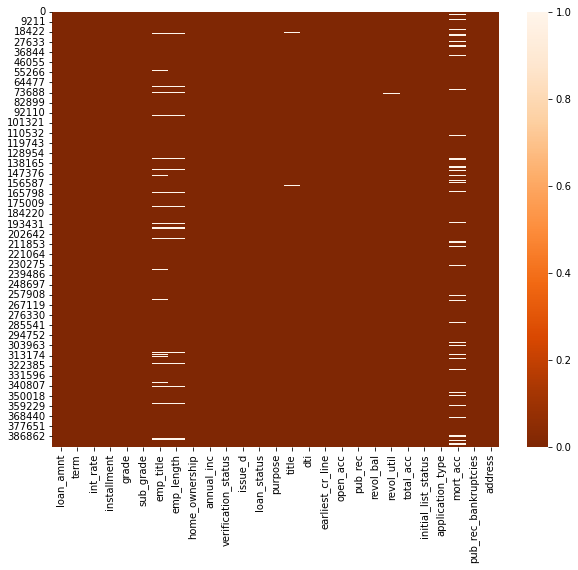

In [12]:
#plotting Heatmap to visualize missing Values
sns.heatmap(df1.isna() ,cmap='Oranges_r')
plt.show()

# **Handelling Missing-values**


In [13]:
#fetching the records associated with the nan values of title
df1[df1['title'].isna()].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
555,8400.0,36 months,15.77,294.37,D,D1,Cocktail server,< 1 year,RENT,41000.0,...,8.0,0.0,3117.0,43.3,10.0,w,INDIVIDUAL,0.0,0.0,"01091 Peter Dale\r\nNew Rebekah, MA 00813"
774,33000.0,36 months,9.80,1061.73,B,B3,Teacher,2 years,RENT,97000.0,...,4.0,0.0,3149.0,31.5,55.0,w,INDIVIDUAL,0.0,0.0,"7584 Byrd Ways Apt. 909\r\nNorth Williamside, ..."
883,7200.0,36 months,6.49,220.65,A,A2,Owner,6 years,RENT,28000.0,...,12.0,1.0,12756.0,32.9,30.0,w,INDIVIDUAL,0.0,0.0,"60659 John Mission\r\nWest Karafurt, UT 48052"
1016,1000.0,36 months,15.31,34.82,C,C5,Agent,1 year,RENT,75000.0,...,8.0,0.0,10765.0,94.0,11.0,w,INDIVIDUAL,0.0,0.0,"25038 Alex Drive Suite 788\r\nFlynntown, UT 05113"
1204,6000.0,36 months,11.47,197.78,B,B5,Machine Operator,8 years,RENT,60000.0,...,6.0,0.0,7304.0,32.5,9.0,w,INDIVIDUAL,0.0,0.0,"582 Reed Trail\r\nEast Victoria, ND 29597"


**As loan has been disbursed for these tittle so instead of dropping them lets fill these null values**

In [14]:
xy=df1[df1['title'].isna()]['application_type'].value_counts()
print(f'{(xy[0])/(xy.sum())*100} % is individual ,\n{(xy[1])/(xy.sum())*100} % is joint ,\n {(xy[2])/(xy.sum())*100} % is Direct_pay')

94.87179487179486 % is individual ,
3.9316239316239314 % is joint ,
 1.1965811965811968 % is Direct_pay


**Inference:** we can see for most of the  `NaN` Values the application type is `individual(94.87%)`, so our further checks lets consider **aplication type** `Individual` to check the Records and what can be the possible values to fill The `NaN`. 

In [15]:
#fetching the records for account type individual
df1[df1['application_type']=='INDIVIDUAL']['title'].value_counts()


Debt consolidation            152061
Credit card refinancing        51360
Home improvement               15230
Other                          12902
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [16]:
#filling null values with Debt consolidation
df1['title'].fillna('Debt consolidation',inplace=True)
print('\n 1755 null values filled with Debt consolidation' )


 1755 null values filled with Debt consolidation


🧹**filling miising values of pub_rec_bankruptcies**

In [17]:
#fetching the records associated with the nan values of title
df1[df1['pub_rec_bankruptcies'].isna()].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
912,5000.0,36 months,9.45,160.05,B,B1,The Sagemont School,3 years,RENT,40000.0,...,7.0,0.0,3212.0,35.7,18.0,f,INDIVIDUAL,NaN,NaN,Unit 7803 Box 8673\r\nDPO AA 22690
1236,9500.0,36 months,8.07,297.99,A,A4,Affinity Marketing Group,2 years,OWN,90000.0,...,11.0,0.0,40384.0,9.6,25.0,f,INDIVIDUAL,NaN,NaN,"PSC 6601, Box 3923\r\nAPO AA 48052"
3314,900.0,36 months,8.63,28.47,A,A5,Network One,4 years,OWN,57000.0,...,2.0,0.0,167.0,3.3,4.0,f,INDIVIDUAL,NaN,NaN,"201 Diaz Garden\r\nSouth Peter, GA 00813"
3767,5000.0,36 months,7.43,155.38,A,A2,Rail Europe Group,4 years,RENT,200000.0,...,2.0,0.0,3164.0,13.7,2.0,f,INDIVIDUAL,NaN,NaN,062 Hunter Freeway Apt. 026\r\nNorth Laurenfor...
5821,4000.0,36 months,9.76,128.62,B,B2,Kaulkin Ginsberg,< 1 year,RENT,63000.0,...,8.0,0.0,4010.0,8.1,17.0,f,INDIVIDUAL,NaN,NaN,"PSC 2418, Box 7919\r\nAPO AE 48052"


In [18]:
xy=df1[df1['pub_rec_bankruptcies'].isna()]['application_type'].value_counts()
print(f'{(xy[0])/(xy.sum())*100} % is individual')

100.0 % is individual


**Inference:** we can see for most of the  `NaN` Values the application type is `individual(100%)`, so our further checks lets consider **aplication type** `Individual` to check the Records and what can be the possible values to fill The `NaN`. 

In [19]:
#fetching the records for account type individual
df1[df1['application_type']=='INDIVIDUAL']['pub_rec_bankruptcies'].value_counts()

0.0    349775
1.0     42688
2.0      1844
3.0       350
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [20]:
#filling null values with 0 times record of pub_rec_bankruptcies
df1['pub_rec_bankruptcies'].fillna(0.0,inplace=True)
print('\n 535 null values filled with 0.0 times record of pub_rec_bankruptcies ' )


 535 null values filled with 0.0 times record of pub_rec_bankruptcies 


🧹**filling miising values of revol_util**

In [21]:
#checking skewness of revol_util
print(df1['revol_util'].skew())
print(f'\n skewness of revol_util is {df1. revol_util.skew()} so data is right or negatively skewed')

-0.07177802032853098

 skewness of revol_util is -0.07177802032853098 so data is right or negatively skewed


In [22]:
#Replacing missing values  of mort_acc with median
df1['revol_util'].fillna(df1['revol_util'].median(),inplace=True)
print(f'\n{df.revol_util.isna().sum()} NaN values replaced with Median of revol_util')


276 NaN values replaced with Median of revol_util


In [23]:
#checking missing values in emp_title and features associated with it
list(df1['emp_title'].unique())

['Marketing',
 'Credit analyst ',
 'Statistician',
 'Client Advocate',
 'Destiny Management Inc.',
 'HR Specialist',
 'Software Development Engineer',
 'Office Depot',
 'Application Architect',
 'Regado Biosciences',
 'Sodexo',
 'Director Bureau of Equipment Inventory',
 'Social Work/Care Manager',
 'Regional Counsel',
 'Pullman Regional Hospital',
 'firefighter',
 'Comcast Corporate office',
 'principal',
 'Pilot',
 'Registered Nurse',
 'Personal Trainer',
 'Francis Howell School District',
 'midstate steel llc',
 'Office Manager',
 'Operations Manager',
 'CSU Monterey Bay',
 'Bartender',
 'Anheuser-Busch ',
 'Teacher',
 'Sr. Business Analyst',
 'Medtronic, Inc.',
 'Stocker',
 'American Heart Association',
 'Senior Software Engineer',
 'dealer',
 nan,
 'facility technician',
 'Housekeeper',
 'Shift Supervisor',
 'American Airlines',
 'laborer',
 'Vegas.com',
 'labor',
 'Home attendant ',
 'Payroll Manager',
 'Litigation Paralegal',
 'Accountant',
 'Cracker Barrel Old Country Store',
 

In [24]:
#fetching records associated with missing values
df1[df1['emp_title'].isna()].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
35,5375.0,36 months,13.11,181.39,B,B4,NaN,NaN,RENT,34000.0,...,9.0,1.0,14998.0,88.7,20.0,f,INDIVIDUAL,5.0,1.0,"23617 Michael Viaduct\r\nWest John, MS 05113"
36,3250.0,36 months,16.78,115.52,C,C5,NaN,NaN,RENT,22500.0,...,7.0,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723"
40,35000.0,60 months,16.99,869.66,D,D1,NaN,4 years,MORTGAGE,130000.0,...,10.0,0.0,34130.0,53.8,27.0,f,INDIVIDUAL,10.0,0.0,"8268 Reed Gardens Suite 996\r\nEast Johnmouth,..."
49,15000.0,36 months,7.89,469.29,A,A5,NaN,NaN,MORTGAGE,90000.0,...,7.0,0.0,8205.0,93.2,18.0,w,INDIVIDUAL,6.0,0.0,"84009 David Stream\r\nSouth Nicolehaven, IL 05113"
58,10000.0,36 months,17.56,359.33,D,D1,NaN,NaN,MORTGAGE,32000.0,...,6.0,0.0,11615.0,82.4,7.0,w,INDIVIDUAL,0.0,0.0,"965 Spencer Courts\r\nPacetown, AZ 00813"


**Inference:** we can see for most of the  `NaN` Values the application type is `individual`, so our further checks lets consider **aplication type** `Individual` to check the Records and what can be the possible values to fill The `NaN`. 

In [25]:
#fetching the records for account type individual
df1[df1['application_type']=='INDIVIDUAL']['emp_title'].value_counts()


Teacher                 4372
Manager                 4236
Registered Nurse        1851
RN                      1843
Supervisor              1824
                        ... 
Dispatch supervor          1
Sales Managment            1
Belanger                   1
OMIV Supervisor            1
Gracon Services, Inc       1
Name: emp_title, Length: 172922, dtype: int64

In [26]:
#filling null values
df1['emp_title'].fillna('Teacher',inplace=True)
print('\n 22927 null values filled with Debt consolidation' )


 22927 null values filled with Debt consolidation


🧹**Filling missing values of emp_lenth**

In [27]:
#checking missing values of emp_title and features associated with it
list(df1['emp_length'].unique())

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year',
 nan]

In [28]:
#fetching the records
df1[df1['emp_length'].isna()].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
35,5375.0,36 months,13.11,181.39,B,B4,Teacher,NaN,RENT,34000.0,...,9.0,1.0,14998.0,88.7,20.0,f,INDIVIDUAL,5.0,1.0,"23617 Michael Viaduct\r\nWest John, MS 05113"
36,3250.0,36 months,16.78,115.52,C,C5,Teacher,NaN,RENT,22500.0,...,7.0,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723"
49,15000.0,36 months,7.89,469.29,A,A5,Teacher,NaN,MORTGAGE,90000.0,...,7.0,0.0,8205.0,93.2,18.0,w,INDIVIDUAL,6.0,0.0,"84009 David Stream\r\nSouth Nicolehaven, IL 05113"
58,10000.0,36 months,17.56,359.33,D,D1,Teacher,NaN,MORTGAGE,32000.0,...,6.0,0.0,11615.0,82.4,7.0,w,INDIVIDUAL,0.0,0.0,"965 Spencer Courts\r\nPacetown, AZ 00813"
91,30225.0,60 months,18.24,771.47,D,D5,Teacher,NaN,MORTGAGE,65800.0,...,11.0,0.0,14390.0,69.5,31.0,w,INDIVIDUAL,1.0,0.0,"493 Michael Route\r\nHillfurt, AZ 70466"


**Inference:** we can see for most of the  `NaN` Values the application type is `individual`, so our further checks lets consider **aplication type** `Individual` to check the Records and what can be the possible values to fill The `NaN`. 

In [29]:
#fetching the records for account type individual
df1[df1['application_type']=='INDIVIDUAL']['emp_length'].value_counts()


10+ years    125807
2 years       35775
< 1 year      31677
3 years       31611
5 years       26454
1 year        25832
4 years       23908
6 years       20817
7 years       20787
8 years       19141
9 years       15283
Name: emp_length, dtype: int64

In [30]:
#filling missing values by using ratio*count
df1['emp_length'].fillna('10+ years',inplace=True)

print('\n18301 nan values of emp_length filled with 10+ years')



18301 nan values of emp_length filled with 10+ years


🧹**Filling missing values of mort_acc**

In [31]:
#checking skewness of mort_acc
print(df1['mort_acc'].skew())
print(f'\n skewness of mort_acct is {df1. mort_acc.skew()} so data is right or positively skewed')

1.6001324380874855

 skewness of mort_acct is 1.6001324380874855 so data is right or positively skewed


In [32]:
#Replacing missing values  of mort_acc with median
df1['mort_acc'].fillna(df1['mort_acc'].median(),inplace=True)
print(f'\n{df.mort_acc.isna().sum()} NaN values replaced with Median of mort_acct')


37795 NaN values replaced with Median of mort_acct


# Checking for missing values after treatment

emp_title               0
emp_length              0
title                   0
revol_util              0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64


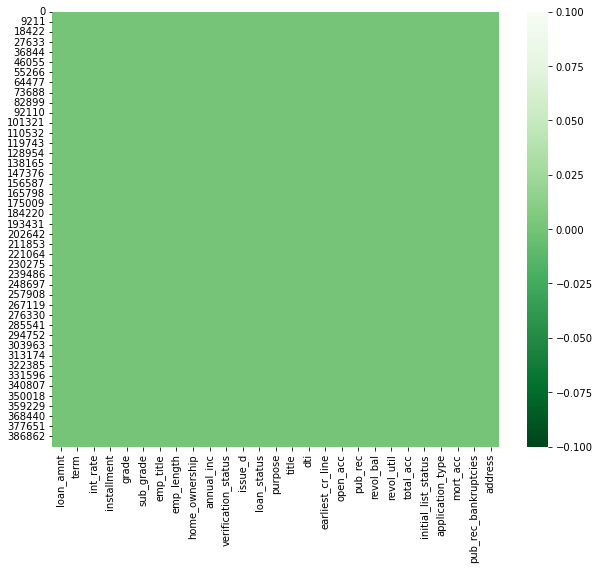

In [33]:
#visualizing Missing-values by using Heatmap
print(df1[null_col].isna().sum())
sns.heatmap(df1.isna(),cmap='Greens_r')
plt.show()

In [34]:
#converting wrongly assigned datatypes to correct datatypes
df1['issue_d']=pd.to_datetime(df1['issue_d'])
df1['earliest_cr_line']=pd.to_datetime(df1['earliest_cr_line'])
df1['open_acc']=df1['open_acc'].astype('int')
df1['pub_rec']=df1['pub_rec'].astype('int')
df1['total_acc']=df1['total_acc'].astype('int')
df1['mort_acc']=df1['mort_acc'].astype('int')
df1['pub_rec_bankruptcies']=df1['pub_rec_bankruptcies'].astype('int')


# Bad Data

**checking insignificant data points in annual income**

In [35]:
df1[df1['annual_inc'] <=0]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
285674,3700.0,36 months,12.59,123.94,C,C2,Teacher,10+ years,MORTGAGE,0.0,...,8,0,10649.0,56.9,20,f,JOINT,1,0,"033 Clark Mountains\r\nBrownfurt, MA 30723"


In [36]:
x=df1[df1['annual_inc']<=0].index
df1.drop(index=x,inplace=True)
print(f'\n{len(x)} annual_income with value less than or equal to zero dropped')


1 annual_income with value less than or equal to zero dropped


*annual_income cannot be `zero` , for loan eligibility annual_income is reqiured, as loan for annual income has disbursed, so we have dropped `zero` annual income*

**checking insignificant data points in annual income**

In [37]:
df1[df1['dti']>100]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
7011,18375.0,60 months,26.24,552.77,E,E5,Teacher,10+ years,MORTGAGE,2500.0,...,5,0,1773.0,46.7,18,w,JOINT,0,0,"739 April Falls Apt. 476\r\nSouth Kimberly, CT..."
36015,15100.0,60 months,9.75,318.98,B,B3,Forman,3 years,MORTGAGE,8000.0,...,17,0,13796.0,33.6,35,w,JOINT,2,0,48700 Brittany Cape Suite 068\r\nNorth Sarahfo...
264045,3200.0,36 months,28.99,134.09,G,G5,Teacher,10+ years,OWN,6672.0,...,6,0,2483.0,49.7,14,f,JOINT,0,0,"91322 Kirsten Mills\r\nSouth Jessica, OR 48052"
294182,15000.0,36 months,15.41,523.00,D,D1,Teacher,10+ years,MORTGAGE,8700.0,...,16,1,7332.0,15.3,26,f,JOINT,2,1,"04833 Benson Tunnel\r\nEast Brookestad, TN 05113"
296164,14000.0,36 months,11.49,461.60,B,B5,Medical Asst,4 years,MORTGAGE,16000.0,...,14,0,30504.0,66.2,36,w,JOINT,5,0,"PSC 5491, Box 7510\r\nAPO AE 22690"
338571,19000.0,60 months,16.99,472.10,D,D3,Distributer,1 year,MORTGAGE,5000.0,...,25,0,19104.0,33.3,62,f,JOINT,3,0,"1981 Johnson Extensions\r\nZacharyport, MN 30723"
350865,24000.0,36 months,9.16,764.99,B,B2,Teacher,10+ years,MORTGAGE,600.0,...,16,0,24733.0,58.5,21,f,JOINT,2,0,"70599 Baker Curve Apt. 425\r\nAbbotthaven, NC ..."


**Inference:** we can see for dti values greater than 100 maximum annual income is `16000$` and minimum annual income is `600$ `, so our further checks lets consider **annual_income**  greater than `600 $` and less than `16000$` to check the Records and what can be the possible values to repalce These bad data points. 

In [38]:
#replacing  dti values greater than 100 with median
x=df1[(df1['annual_inc']>=600) & (df1['annual_inc']<=16000)]['dti']
x

473       11.60
506        1.25
538       15.43
562       25.00
917       29.57
          ...  
395486    29.92
395805    32.30
395908    15.70
395915    27.38
395941    16.57
Name: dti, Length: 2407, dtype: float64

In [39]:
#replacing dti values greater than 100 with nan.
df1['dti'].replace([ 189.9 ,  145.65,  107.55,  120.66,  138.03,  380.53, 1622 ],round(x.median(),2),inplace=True)


print(f'\ndti values greater than 100 replaced with median {round(x.median(),2)} of dti values corresponding to the annual_income greater than 600 $ and less than 16000$')


dti values greater than 100 replaced with median 17.27 of dti values corresponding to the annual_income greater than 600 $ and less than 16000$


<a id='outliers'></a>
# 3.3 Outlier Analysis and Treatment

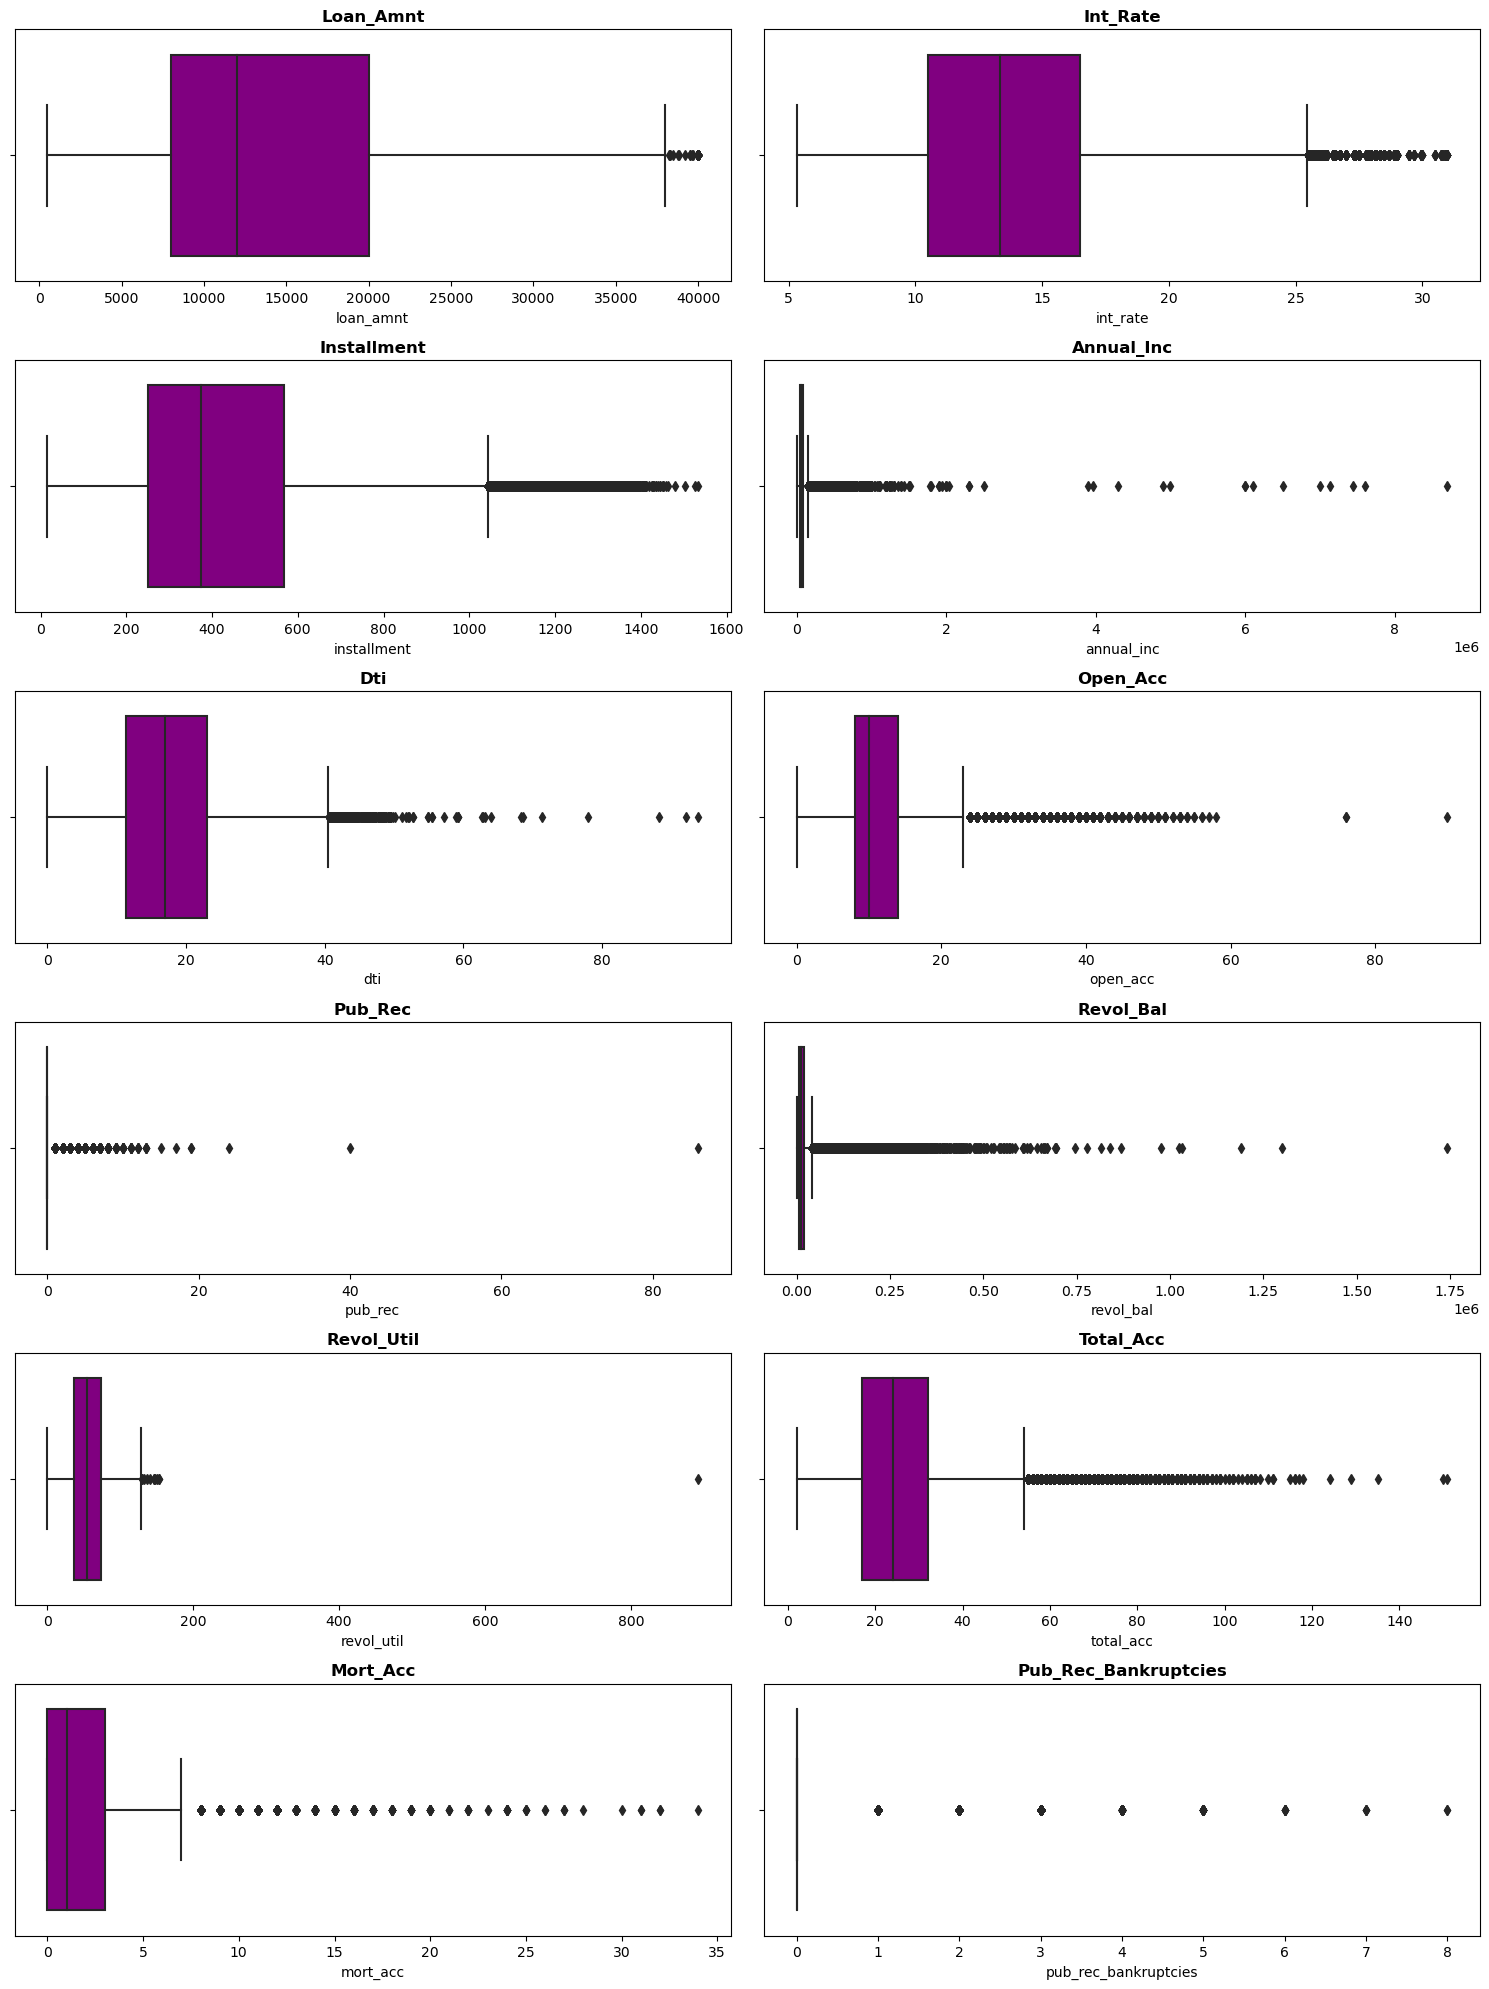

In [40]:
#checking for outliers by visualisizing boxplot
plt.figure(figsize=(15,20),dpi=100)
n=1
for i in df1.describe().columns:
    plt.subplot(6,2,n)
    n+=1
    sns.boxplot(df1[i],color='purple',saturation=2)
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

📝**Inference:** By Visualizing above boxplot we can see that all the Features have potential outliers and i some features there are extreme values as well.

**Outliers:** Outliers is an observation which deviates so much from the other observations, that it become suspicious that it was generated by different mechanism or simply by error

**Extreme Values:** Extreme Values is an observation with value at the boundaries of the domain
    
**Reason for outliers exist in the data:**
1. Variability in the Data
2. An experimental measurment error

**Impact of outliers on Dataset:**
1. it causes various problem during statstical analysis
2. It effects the mean and standard deviation


# **Identify outliers and extreme values**

In [41]:
#fetching outliers and extreme values
outliers = {}
def detect_outliers_iqr(dataframe):
    #dataframe = dataframe.select_dtypes(include=[np.number])
    for j in dataframe.columns:
        q1 = np.quantile(dataframe[j],0.25)
        q3 = np.quantile(dataframe[j],0.75)
        # print(q1, q3)
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        # print(lwr_bound, upr_bound)
        outliers[j] = []
        for i in dataframe[j]: 
            if (i<lwr_bound or i>upr_bound):
                outliers[j].append(i)
    return outliers# Driver code

In [42]:
ddf = df1.select_dtypes(include=[np.number])

In [43]:
a = detect_outliers_iqr(ddf)

In [44]:
for i in a:
    print(f"Column Name\t: {i}\nOutlier Values\t: {pd.Series(a[i]).unique()}\n\n")

Column Name	: loan_amnt
Outlier Values	: [40000. 38225. 39700. 38475. 39500. 39600. 39475. 38825. 38300. 38275.
 39200. 38750.]


Column Name	: int_rate
Outlier Values	: [25.78 25.83 27.31 28.99 25.99 25.89 25.49 25.57 28.67 27.49 25.8  26.06
 27.34 28.14 28.18 28.49 27.88 25.88 26.77 26.49 25.69 26.24 26.57 26.99
 26.14 27.79 29.49 30.74 27.99 25.65 30.49 29.96 28.88 28.34 29.67 30.94
 30.99 30.79 29.99 30.89 28.69 30.84]


Column Name	: installment
Outlier Values	: [1207.13 1063.87 1198.94 ... 1100.49 1055.22 1191.16]


Column Name	: annual_inc
Outlier Values	: [187321. 170000. 224000. ... 163696. 189875. 174740.]


Column Name	: dti
Outlier Values	: [43.69 40.81 42.54 43.24 51.2  58.9  46.12 48.56 45.6  41.56 44.24 49.42
 44.28 48.11 44.07 42.39 41.89 59.26 41.43 42.15 46.44 45.37 48.13 40.57
 42.48 44.22 49.38 46.05 88.21 40.63 47.43 46.31 42.26 45.87 43.36 43.21
 43.34 41.78 42.92 42.57 44.59 41.05 43.89 46.33 43.08 42.58 48.68 44.57
 41.87 45.28 40.58 44.56 44.16 62.7  47.05 43.5

📝**Inference:**  *The above Data points are extreme values , instead of removing or flooring or capping these data point, we can use various transformation:
`sqrt transformation , log transformation ,reciprocal transformation , box-cox transformation etc..` to reduce the impact of these data points in the dataset.

**-**: Removing or capping these data-points would limit the model capability to predict extreme values.
 

# Skewness

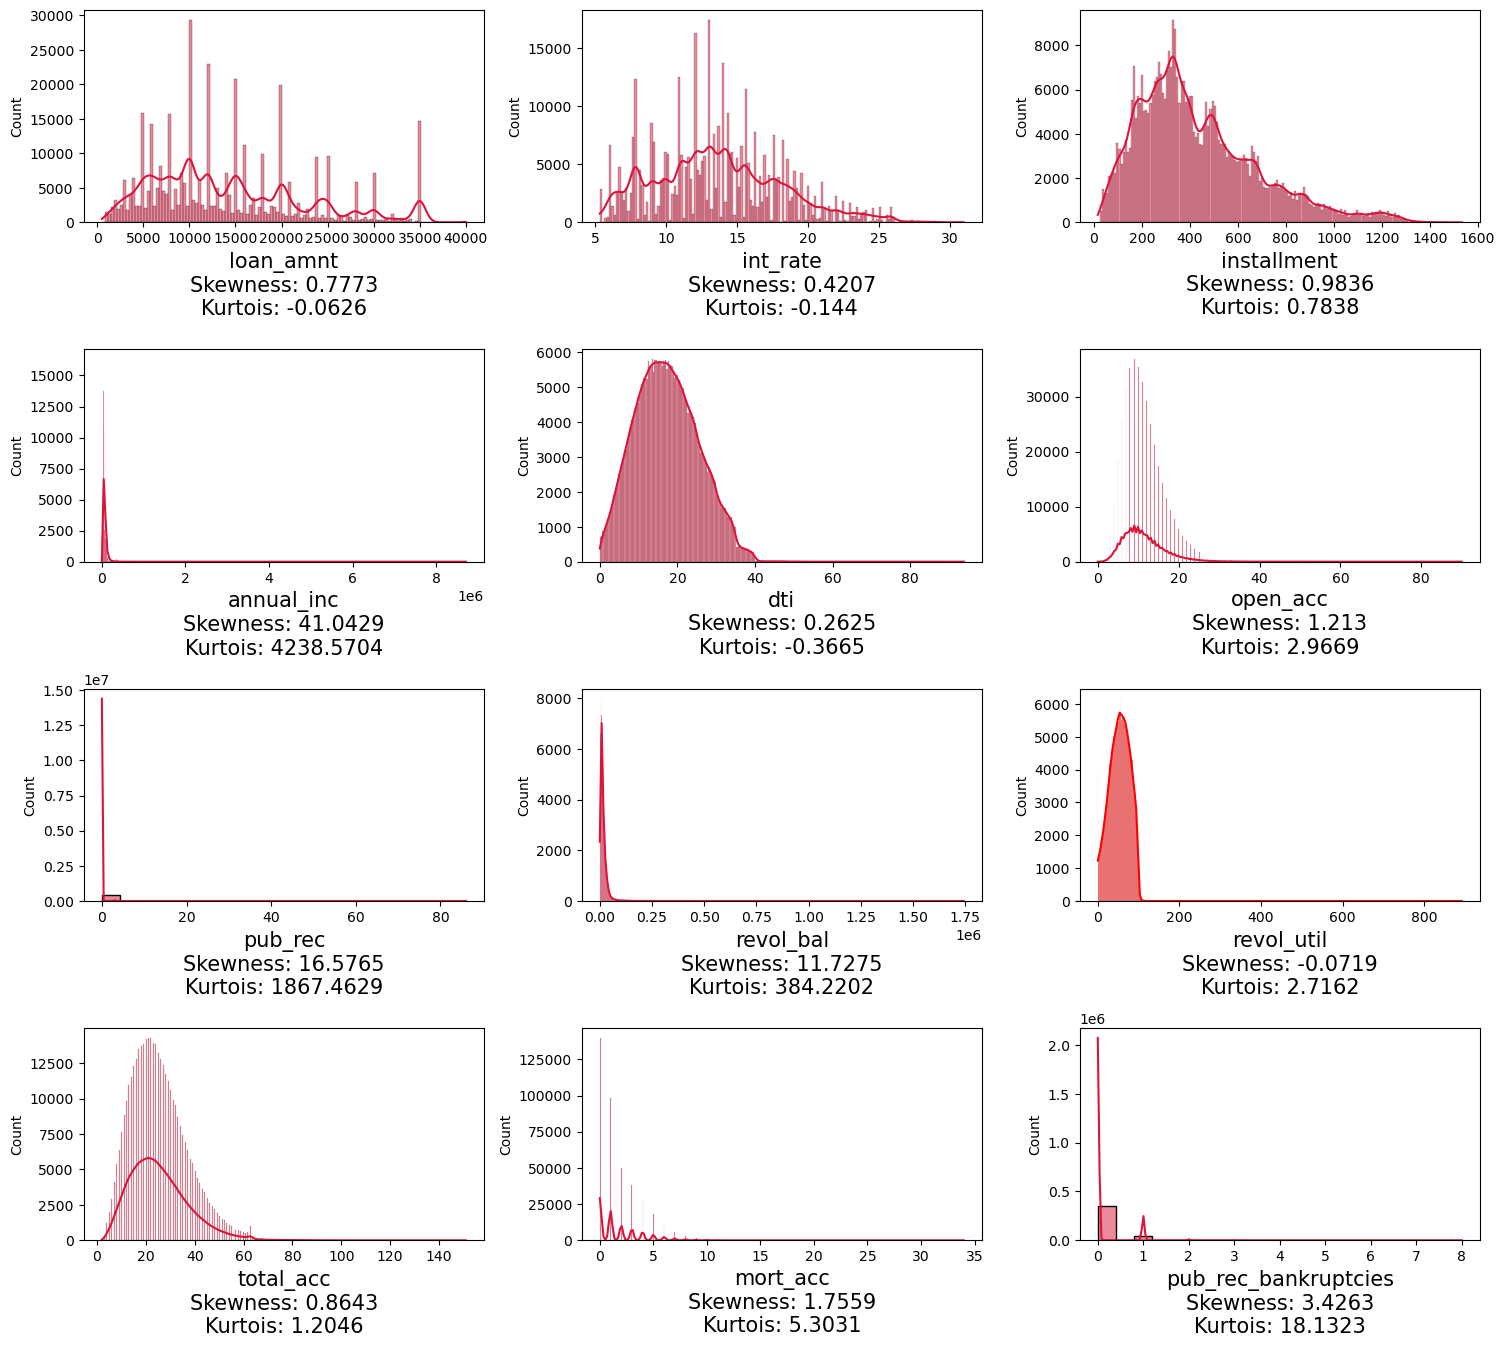

In [45]:
#checking and visualizing skewness of each feature by using dist plot
#checking skewness and normallity of data by visualizing graphs
plt.figure(figsize=(15,16),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(5,3,n)
    n+=1
    if df[i].skew() < 0 :
        sns.histplot(df1[i] ,color='red',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df1[i].skew(),4)}\nKurtois: {round(df1[i].kurt(),4)}",fontsize=15)
    else:
        sns.histplot(df1[i],color='crimson',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df1[i].skew(),4)}\nKurtois: {round(df1[i].kurt(),4)}",fontsize=15)
plt.tight_layout()

**Inference:** Here by visualizing dist plot we can see that the **Features** plotted in `Teal color` are `positively skewed` and **Features** plotted in `red color` are `Negatively Skewed`.

**--:** *To reduce the impact of skewness we can use various transformation techiniques here we are using box cox tranformation*

# Box-cox transformation

In [46]:
#creating copy of data
data_df=df1.copy()

In [47]:
#applying box-cox tranformation
for i in data_df.describe().columns:
    if any(data_df[i] <= 0):
        print('\n{} ,Data must be positive i.e. 0.0'.format(i))
    else:
        fitted_data, fitted_lambda = stats.boxcox(data_df[i])
        print('\nfor {},  lambda(⋌) value is {})'.format(i ,fitted_lambda))        


for loan_amnt,  lambda(⋌) value is 0.3600436772424344)

for int_rate,  lambda(⋌) value is 0.43069268671929106)

for installment,  lambda(⋌) value is 0.3317826728265702)

for annual_inc,  lambda(⋌) value is -0.08722853383995202)

dti ,Data must be positive i.e. 0.0

open_acc ,Data must be positive i.e. 0.0

pub_rec ,Data must be positive i.e. 0.0

revol_bal ,Data must be positive i.e. 0.0

revol_util ,Data must be positive i.e. 0.0

for total_acc,  lambda(⋌) value is 0.3655986295802162)

mort_acc ,Data must be positive i.e. 0.0

pub_rec_bankruptcies ,Data must be positive i.e. 0.0


**Here we have applied box cox transformation on whole dataset and we have calculated lamda values for each features,
for some features u can see there is an error `Data must be positive`, it is because box-cox transformation is extremely sensitive to negative data or 0.**

**--** *for  open_acc ,pub_rec , mort_acc , pub_rec_bankruptcies  we can use sqaure root transformation because these features contains 0.*

In [48]:
#repacing 0 with 0.01
data_df['dti'].replace(0.0,0.01 ,inplace=True)
data_df['revol_bal'].replace(0.0,0.01 ,inplace=True)
data_df['revol_util'].replace(0.0,0.01 ,inplace=True)


In [49]:
#applying box-cox tranformation once again
y=[ 'installment', 'annual_inc', 'revol_bal', 'revol_util','dti', 'total_acc']
data=[]
lamda=[]
for i in y:
    if any(data_df[i] <= 0):
        print('\n{} ,Data must be positive i.e. 0.0'.format(i))
    else:
        fitted_data, fitted_lambda = stats.boxcox(data_df[i])
        print('\nfor {},  lambda(⋌) value is {})'.format(i ,fitted_lambda))
        data.append(fitted_data)
        lamda.append(fitted_lambda)
    


for installment,  lambda(⋌) value is 0.3317826728265702)

for annual_inc,  lambda(⋌) value is -0.08722853383995202)

for revol_bal,  lambda(⋌) value is 0.2677057542347189)

for revol_util,  lambda(⋌) value is 0.8820083427470228)

for dti,  lambda(⋌) value is 0.7251856714193478)

for total_acc,  lambda(⋌) value is 0.3655986295802162)


In [50]:
#creating a new dataframe of transformed values
box_coxT=pd.DataFrame({'installment':data[0],'annual_inc':data[1],
           'revol_bal':data[2],'revol_util':data[3],'dti':data[4],'total_acc':data[5]})

box_coxT.reset_index(inplace=True,drop=True)

In [51]:
x=['loan_amnt','open_acc','pub_rec','mort_acc','pub_rec_bankruptcies']
sqrt_t=data_df[x].apply(lambda x : np.sqrt(x))

sqrt_t.reset_index(inplace=True ,drop=True)

In [52]:
z=data_df['int_rate'].apply(lambda x: np.log(x))

In [53]:
transf_data=pd.concat(objs=[box_coxT ,sqrt_t,z] ,axis=1)
transf_data.head()

,installment,annual_inc,revol_bal,revol_util,dti,total_acc,loan_amnt,open_acc,pub_rec,mort_acc,pub_rec_bankruptcies,int_rate
0,17.616887,7.321748,58.390975,29.374545,13.363267,6.137962,100.000000,4.000000,0.0,0.000000,0.0,2.437116
1,16.195059,7.103822,49.293357,36.668253,11.615898,6.391172,89.442719,4.123106,0.0,1.732051,0.0,2.484073
2,20.787929,6.944324,42.421448,60.162822,7.375666,6.266112,124.899960,3.605551,0.0,0.000000,0.0,2.350422
3,15.047181,7.032731,33.681258,15.838854,1.378340,4.251130,84.852814,2.449490,0.0,0.000000,0.0,1.870263
4,22.285490,7.039818,52.207490,46.820040,16.391306,8.083814,156.124950,3.605551,0.0,1.000000,0.0,2.848971


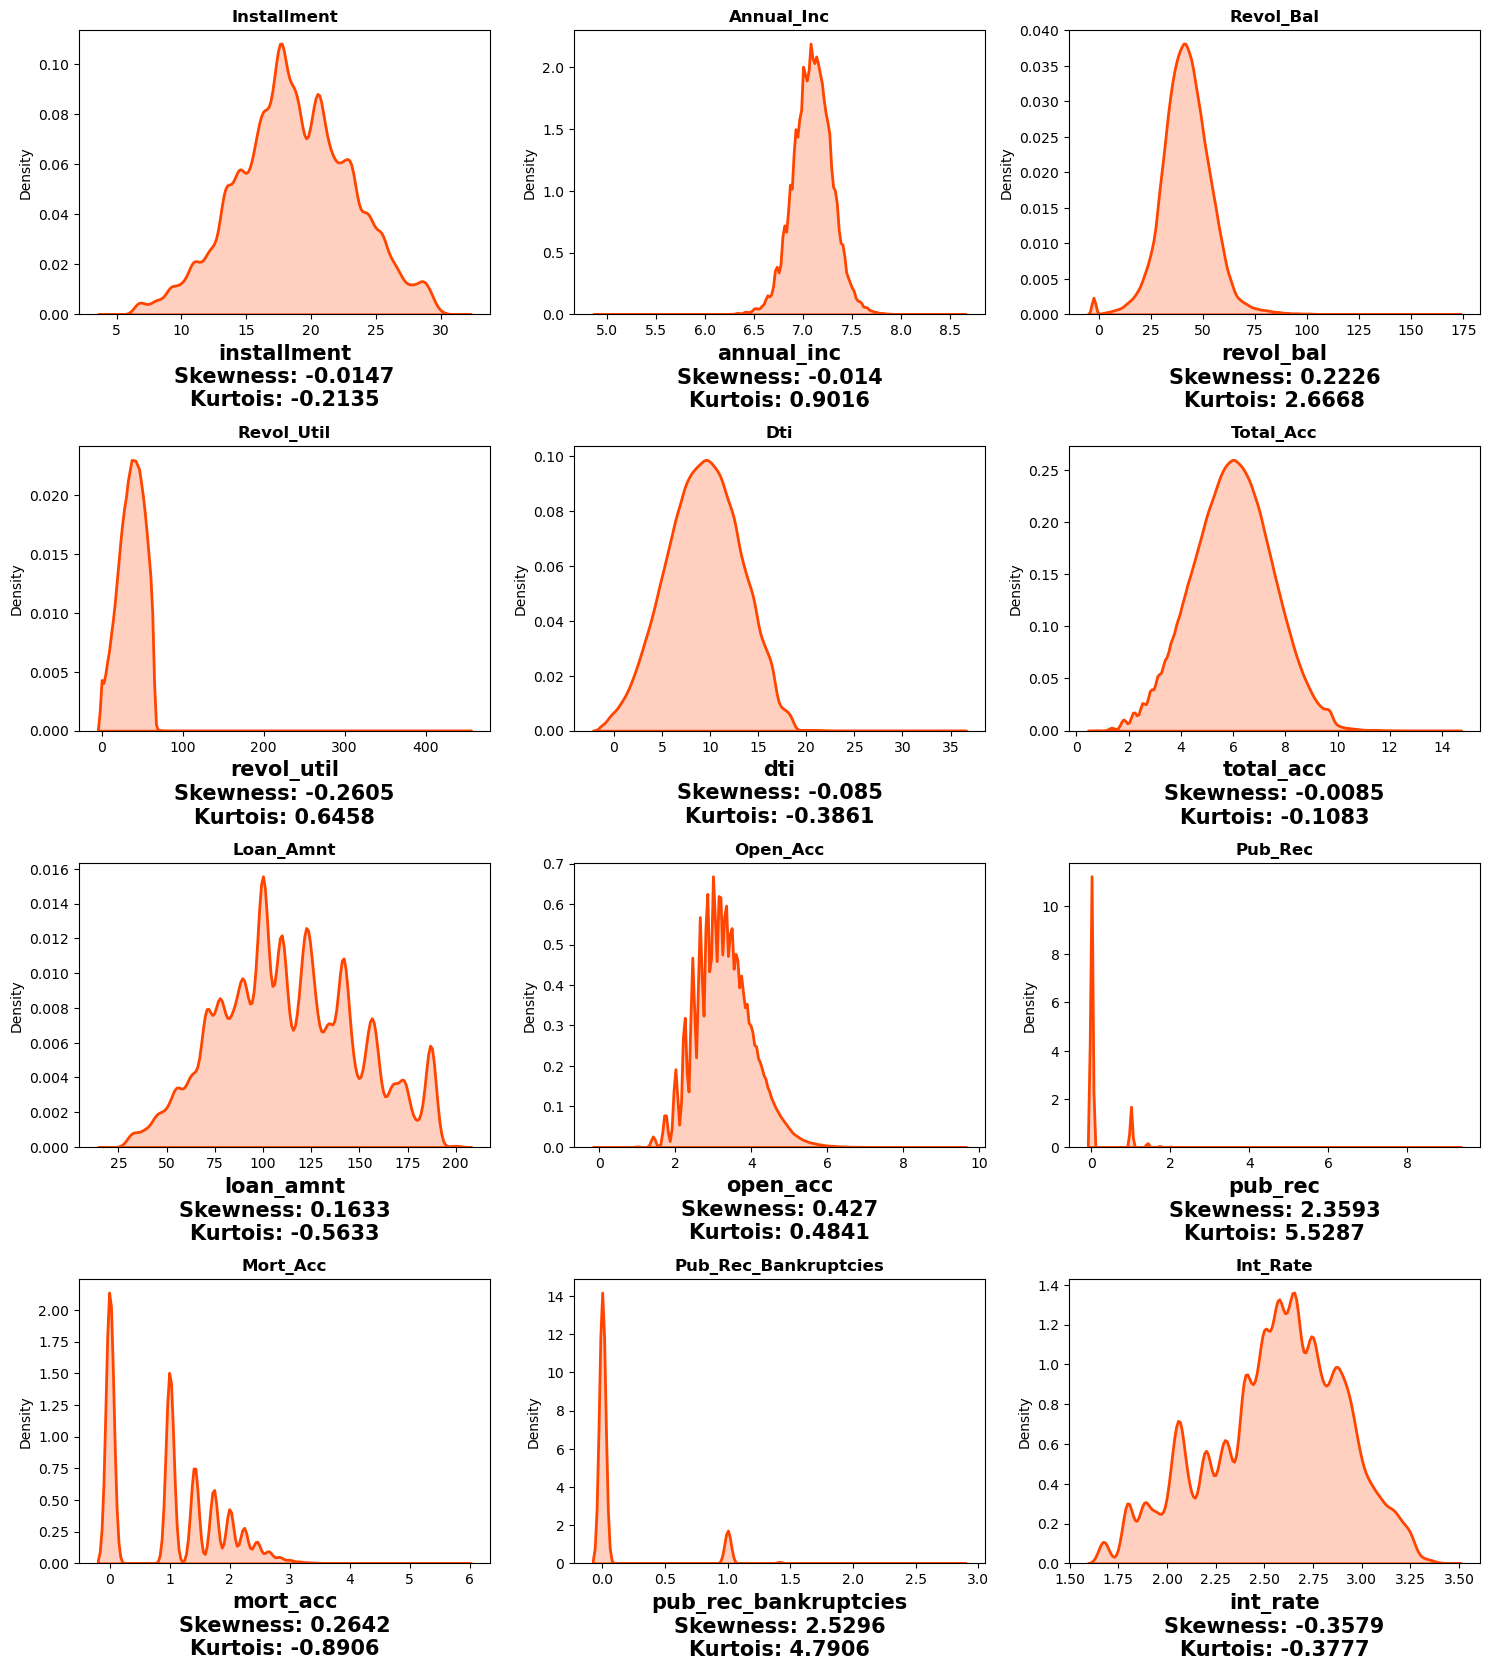

In [54]:
#checking distribution of data after transformation
plt.figure(figsize=(15,20),dpi=100)
n=1

for i in transf_data.describe().columns:
    plt.subplot(5,3,n)
    n+=1
    sns.distplot(transf_data[i],color='orangered',kde=True ,hist = False,kde_kws = {'shade': True, 'linewidth': 2})
    plt.title(f'{i.title()}',weight='bold')
    plt.xlabel(f"{i}\nSkewness: {round(transf_data[i].skew(),4)}\nKurtois: {round(transf_data[i].kurt(),4)}",fontsize=15,weight='bold')
    plt.tight_layout()

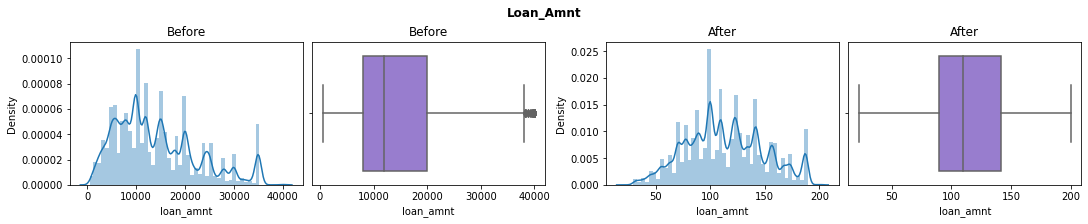

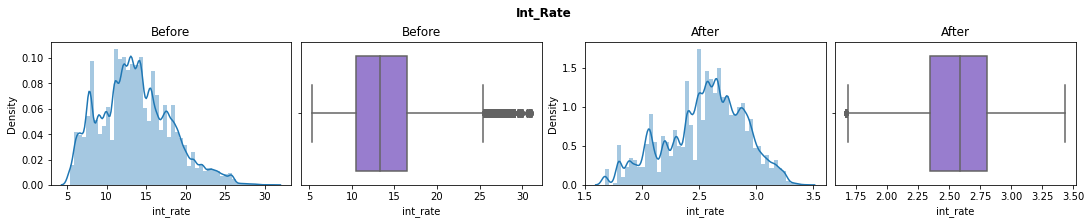

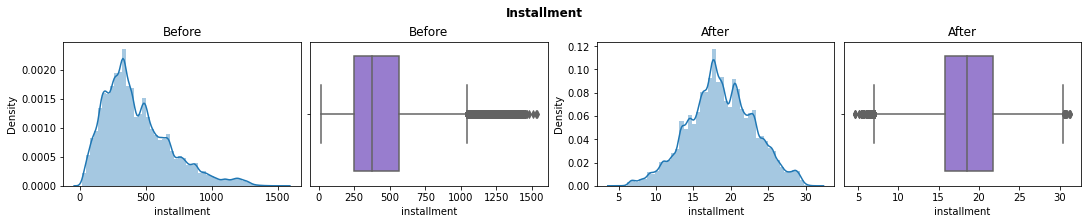

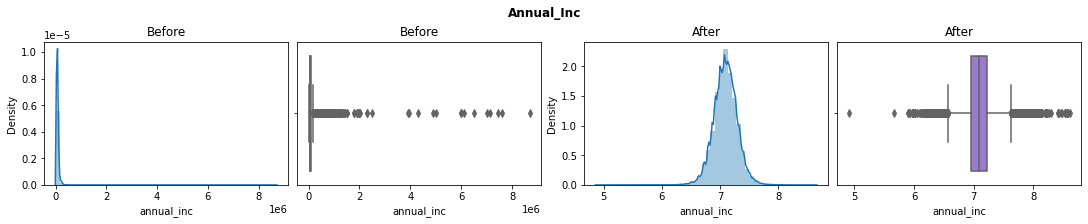

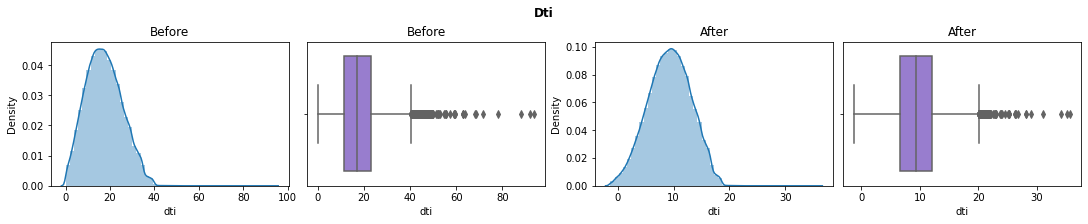

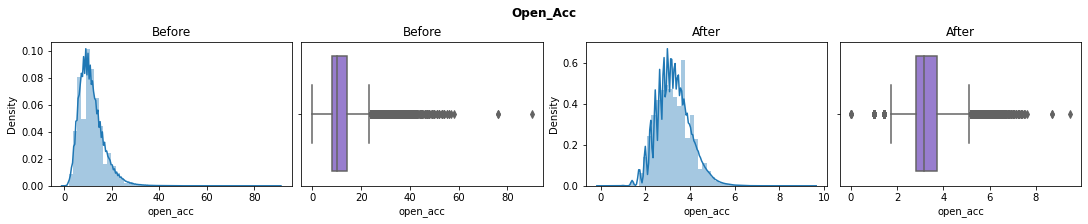

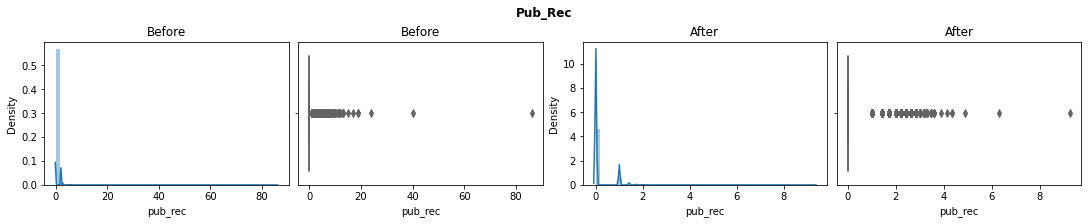

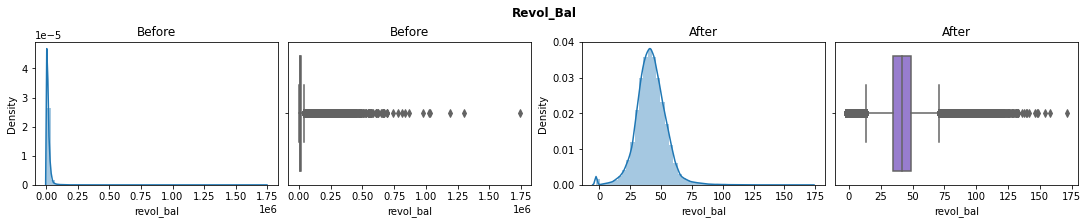

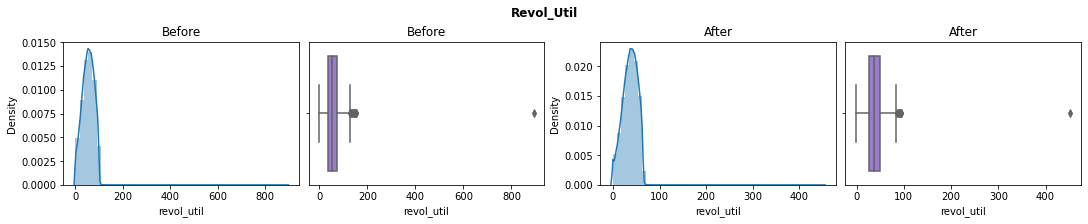

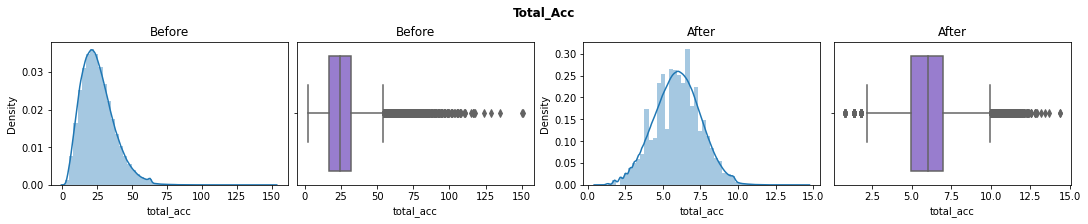

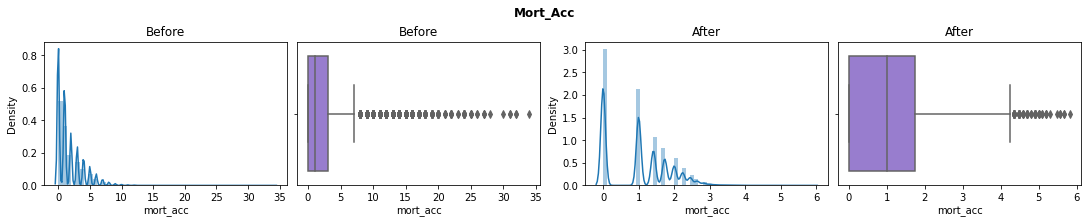

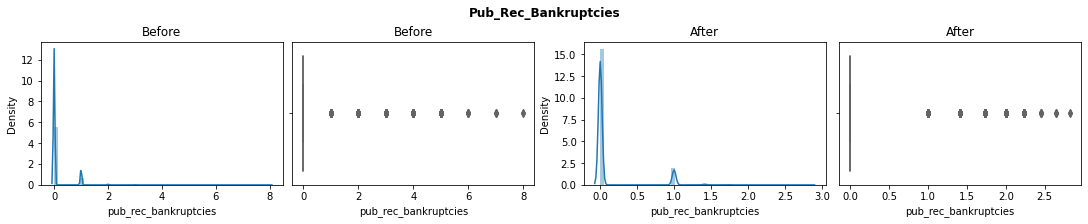

In [55]:
for i in df.describe().columns:
    # before treating outliers
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df1[i], ax=ax[0]).set(title="Before")
  sns.boxplot(df1[i], ax=ax[1],color='mediumpurple').set(title="Before")
  # After treating outliers
  sns.distplot(transf_data[i], ax=ax[2]).set(title="After")
  sns.boxplot(transf_data[i], ax=ax[3],color='mediumpurple').set(title="After")
  plt.suptitle(f'{i.title()}',weight='bold')
  fig.show()


**INTERPRETATION:** *We can see after transformation effect of extreme values significantly reduced and data becomes more normal than before.*

<a id='drop'></a>
# 3.4 Remove Categorical Variables

# **Drop the Features which have only one unique sub-features within it** 

In [56]:
#droping features which have onle one sub-categories within it.
x=df1.nunique()

print(df1[list(x[x<=1].index)].columns)

Index([], dtype='object')


📝*Dataset have no such features which have only one unique value within it*

In [57]:
#dropping categorical features
df1.drop(columns='address',inplace=True)

<div align="center">
    <font color="purple" size=6px>
        <b> DESCRIPTIVE ANALYSIS(EDA)                                   
                                   
                                   

# Feature Engineering

In [58]:
#creating some new features to perform eda
df1['issue_year']=df1['issue_d'].dt.year
df1['issue_month']=df1['issue_d'].dt.month
df1['earliest_cr_line_month']=df1['earliest_cr_line'].dt.month
df1['earliest_cr_line_year']=df1['earliest_cr_line'].dt.year


In [59]:
#dropping issue_d','earliest_cr_line'
df1.drop(columns=['issue_d','earliest_cr_line'],inplace=True)

In [60]:
df1['purpose'].value_counts()

debt_consolidation    234507
credit_card            83018
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

# 🙌UNIVARIATE ANALYISIS

In [61]:
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

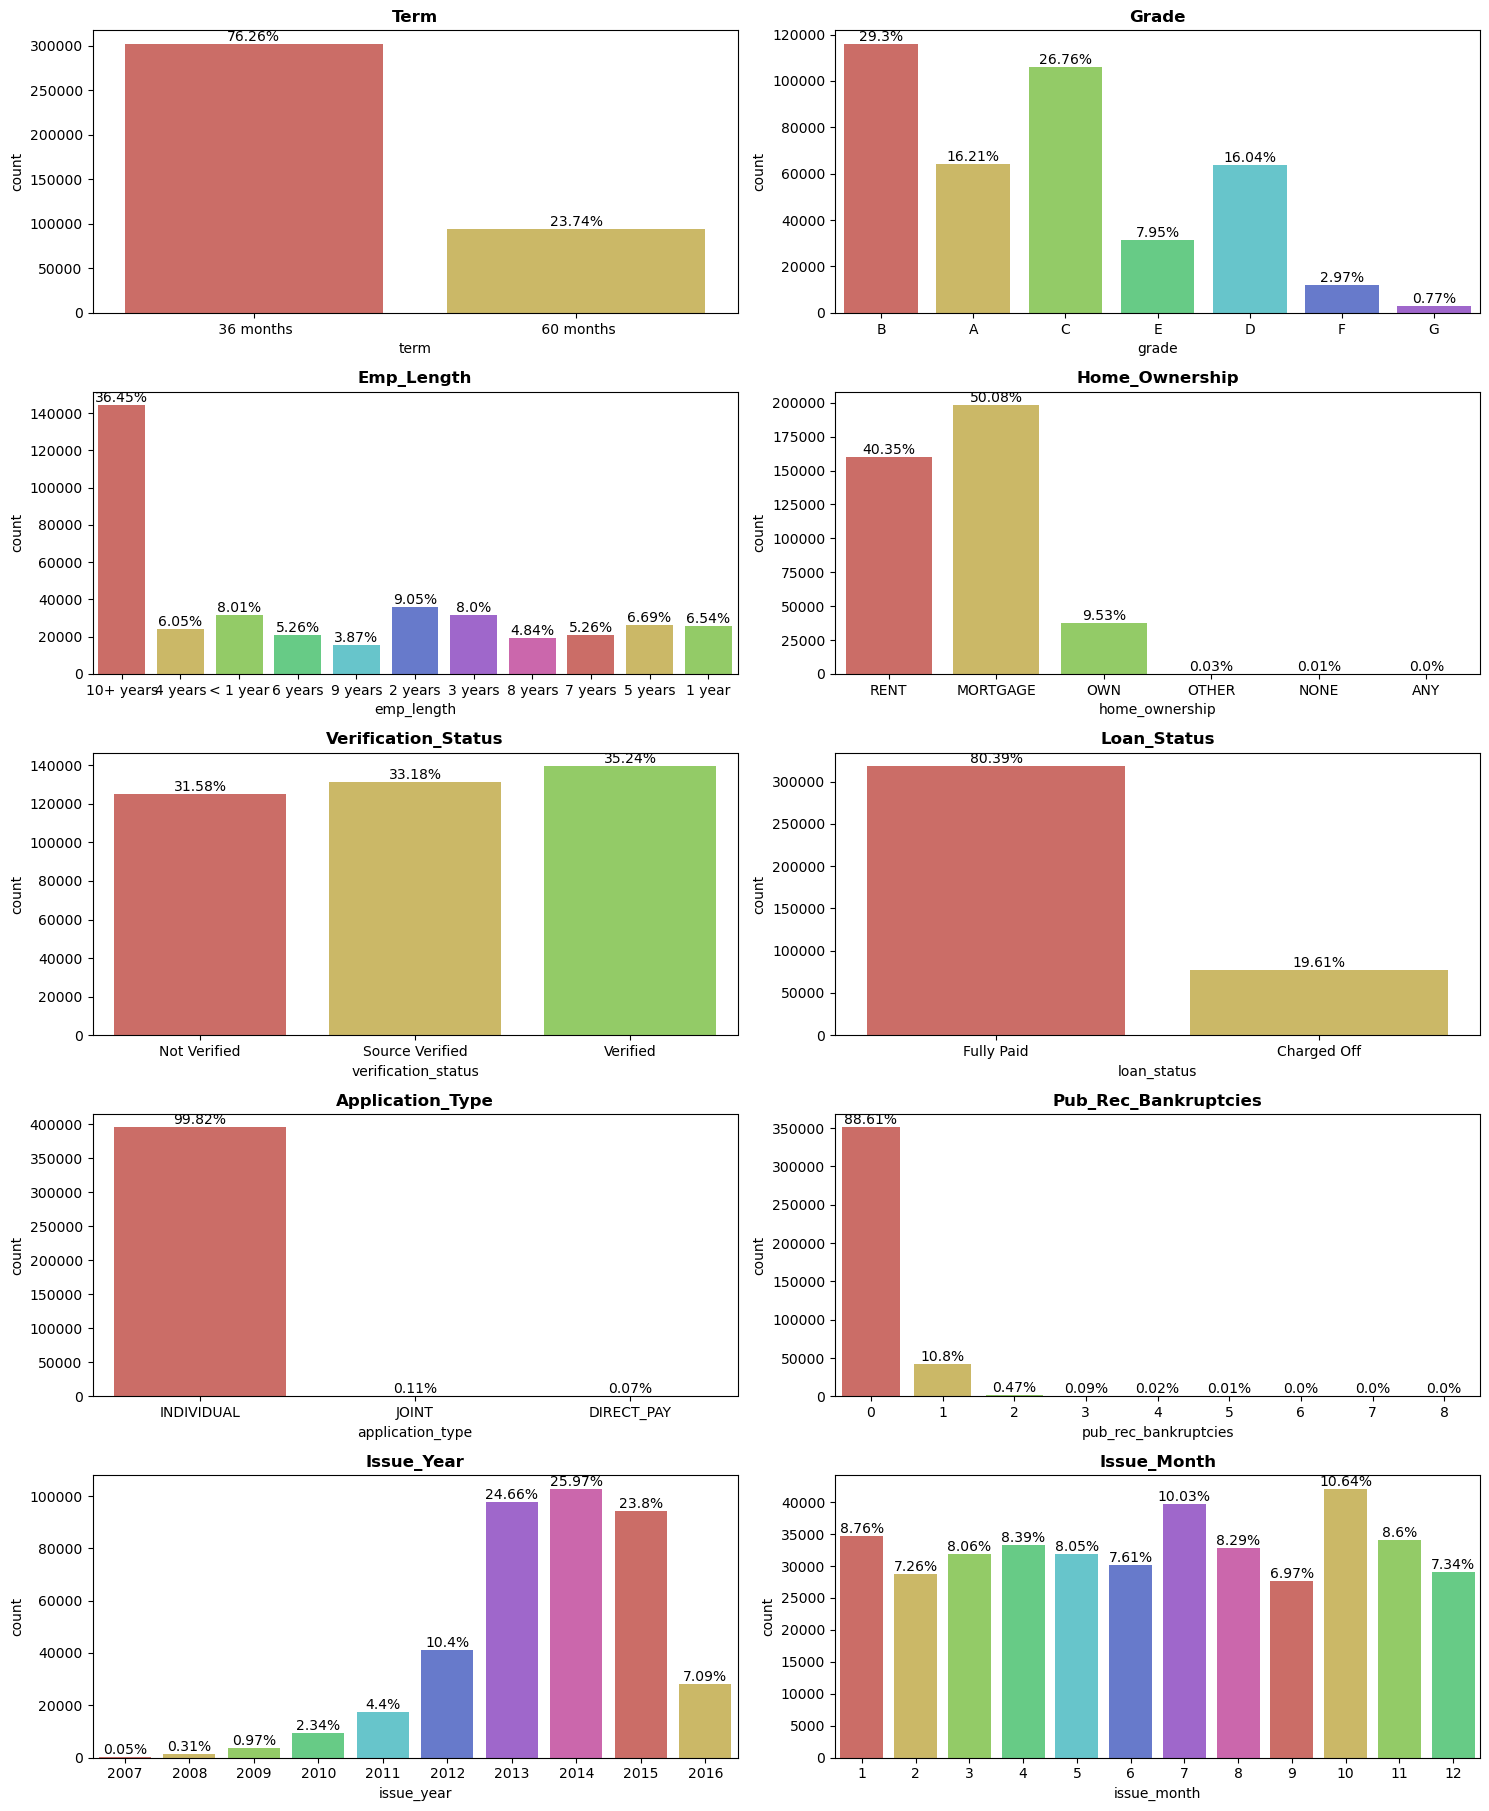

In [62]:
#plotting countplot for some categoriacal variable
col=['term', 'grade','emp_length', 'home_ownership','verification_status', 'loan_status','application_type', 
     'pub_rec_bankruptcies', 'issue_year', 'issue_month']
plt.figure(figsize=(15,25),dpi=100)
n=1
for i in col:
    plot=plt.subplot(7,2,n)
    n+=1
    sns.countplot(df1[i] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

**INSIGHTS:**

1. Most of the borrower`(76.26%)` have choosen `36 month` term for their loan repayment, only `23.74%` borrower choose for `60 month` term for their loan repayment


2. `29.3% `loan disbursed in **B** grade category(Interest rate category), followed by **C** grade `26.76%` and so on.


3. For Most of the borrower employment lenth is `10+ Year(36.45%)`, that means most of the loan given to the person whose  employement lenth `10+ year` then followed by employment lenth `2yaers(9.05%)` and so on.


4. `50.08%` Borrowers in their loan application about the home ownership shows that they have already a loan running on their house(`Mortage`)., then followed by Borrowers(`40.35%`) who live in a rented house. very few borrowers(`9.53%`) shown in their application that they own a house.


5. `35.24%` Borrower's income are Lending club Verified followed by Source Verified(`33.18%`) and then not verified(`31.58%`).


6. `99.82%` borrowers applied for the loan as individual,i.e., no co-borrowers , only `0.11%` applied  jointly(with two co-borrowers) for the the loan. 


7. `88.61%`  Borrowers have 0 record of public Bankrupties, followed by 1 time record(`10.08%`) public record bankrupties 
 and so on.
 

8. Most of the Loan(`25.97%`) Issued in 2014, followed by `24.66%` in 2013 ,`23.8%` in 2015 and so on.


9.  Most of the Loan(`10.64%`) Issued in october, followed by `10.03%` in july ,`8.76%` in january and so on.


10. `80.39%`  Borrowers have fully paid their Loan, and `19.61%` Borrowers have defaulted from their Loan.


In [63]:
#calculating top 10 emp_category and purpose
emp_title_10=df1['emp_title'].value_counts().head(10)
loan_purpose_10=df1['purpose'].value_counts().head(10)

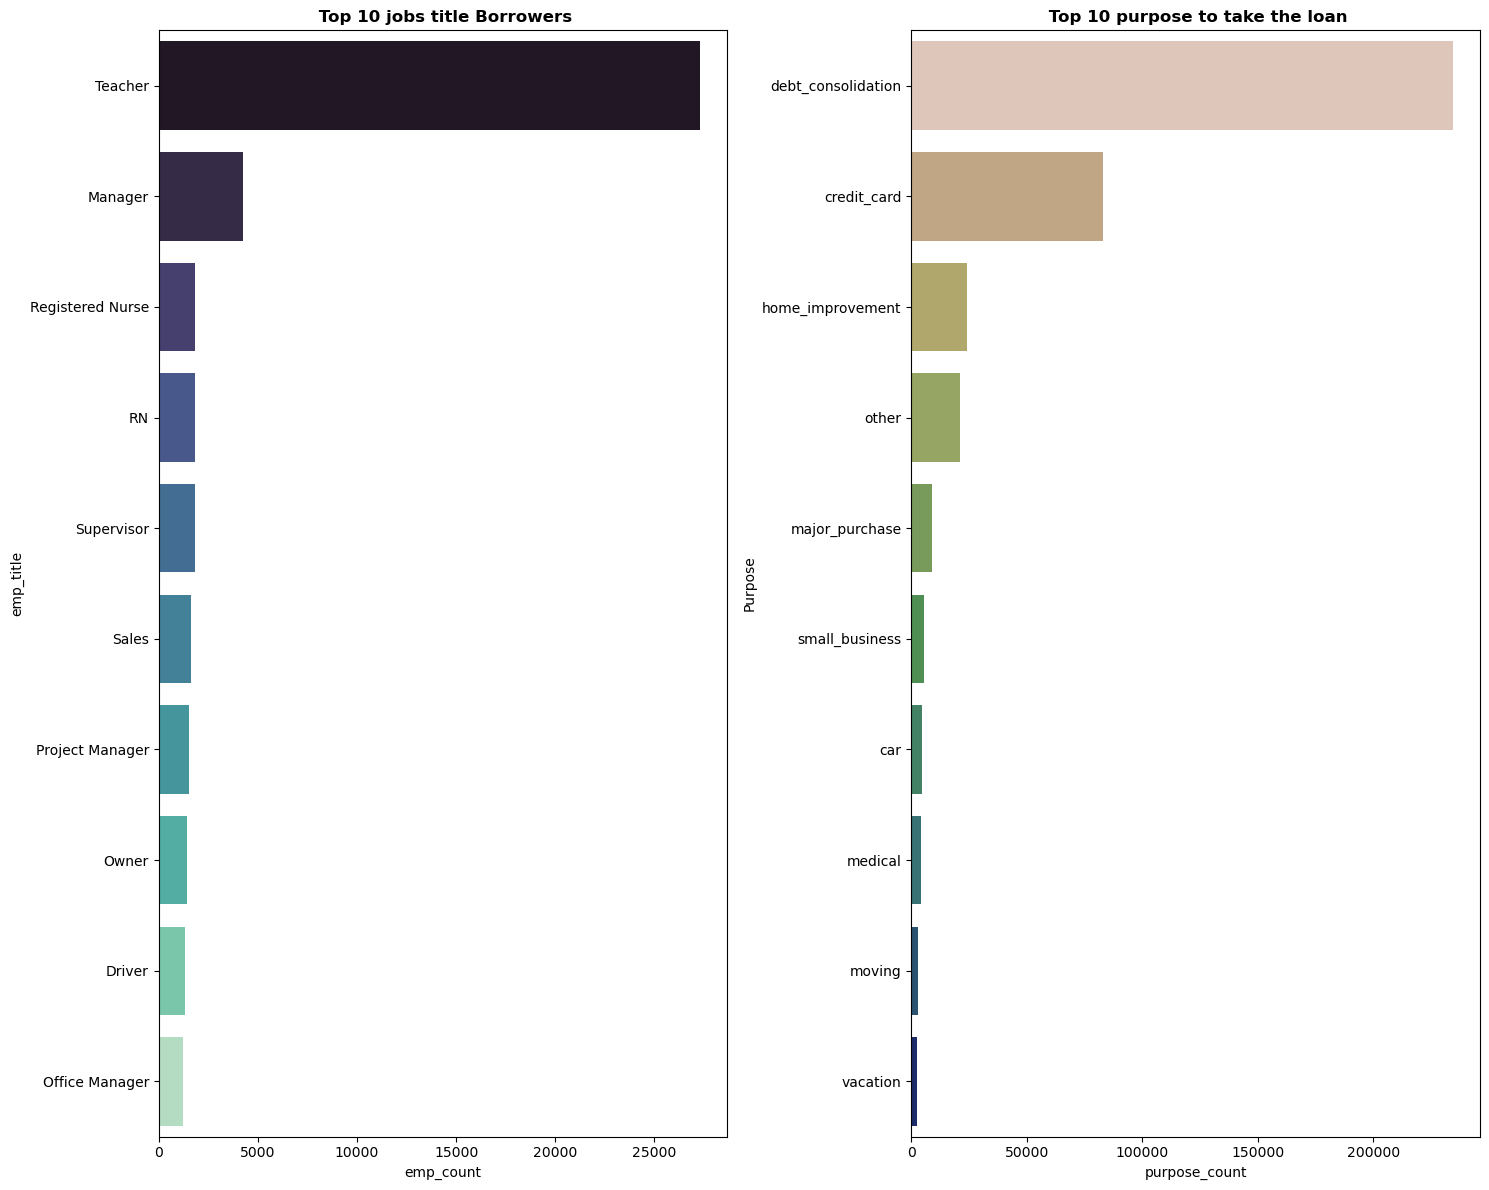

In [64]:
#plotting barplot
plt.figure(figsize=(15,12),dpi=100)
plt.subplot(1,2,1)
sns.barplot(y=emp_title_10.index ,x=emp_title_10.values , palette='mako')
plt.xlabel('emp_count')
plt.ylabel('emp_title')
plt.title(" Top 10 jobs title Borrowers",weight='bold')
plt.subplot(1,2,2)
sns.barplot(y=loan_purpose_10.index ,x=loan_purpose_10.values,palette='gist_earth_r')
plt.xlabel('purpose_count')
plt.ylabel('Purpose')
plt.title(" Top 10 purpose to take the loan",weight='bold')
plt.tight_layout()

**INSIGHT :**

1. Most of the Borrowers employment title is `Teacher` , followed by ` Manager ,Registered Nurse` and so on.


2. Most of the Borrowers , took the loan for `debt_consolidation` ,`followed by credit card, home improvement` and so on.

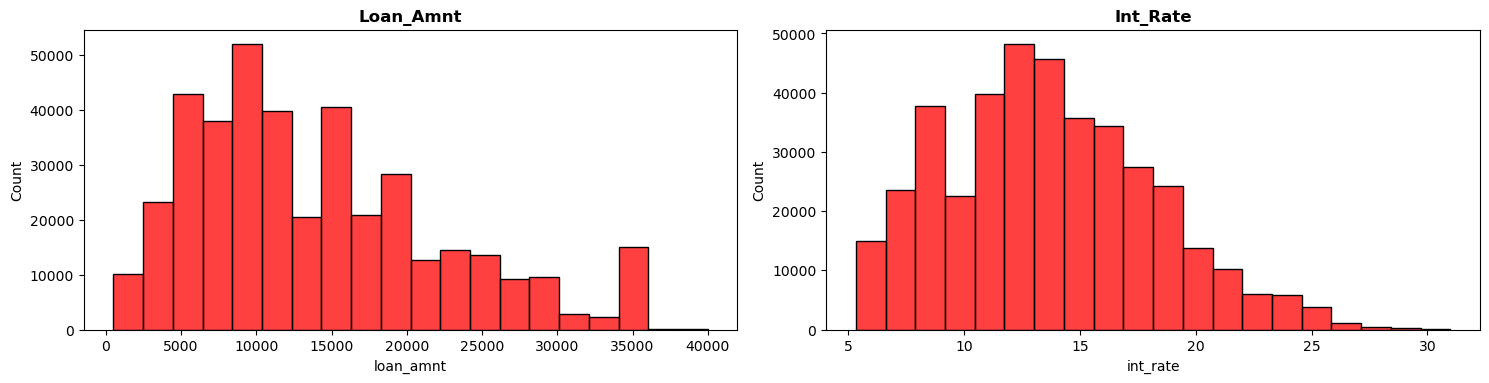

In [65]:
#plotting histplot to check the distribution interest rate and loan amount
cat_col=['loan_amnt', 'int_rate']
plt.figure(figsize=(15,25),dpi=100)
n=1
for i in cat_col:
    plot=plt.subplot(7,2,n)
    n+=1
    sns.histplot(df1[i] ,color='red',bins=20)
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

**INSIGHT :** 
1. Most of the Borrower have taken Loan with an amount between `5000$ - 10000$`


2. Most of the Borrower have taken Loan with an interest rate `10% to 15%`, very few Borrower have taken loan with an interest rest of `30.99%` 




# 🙌Bivariate Analysis

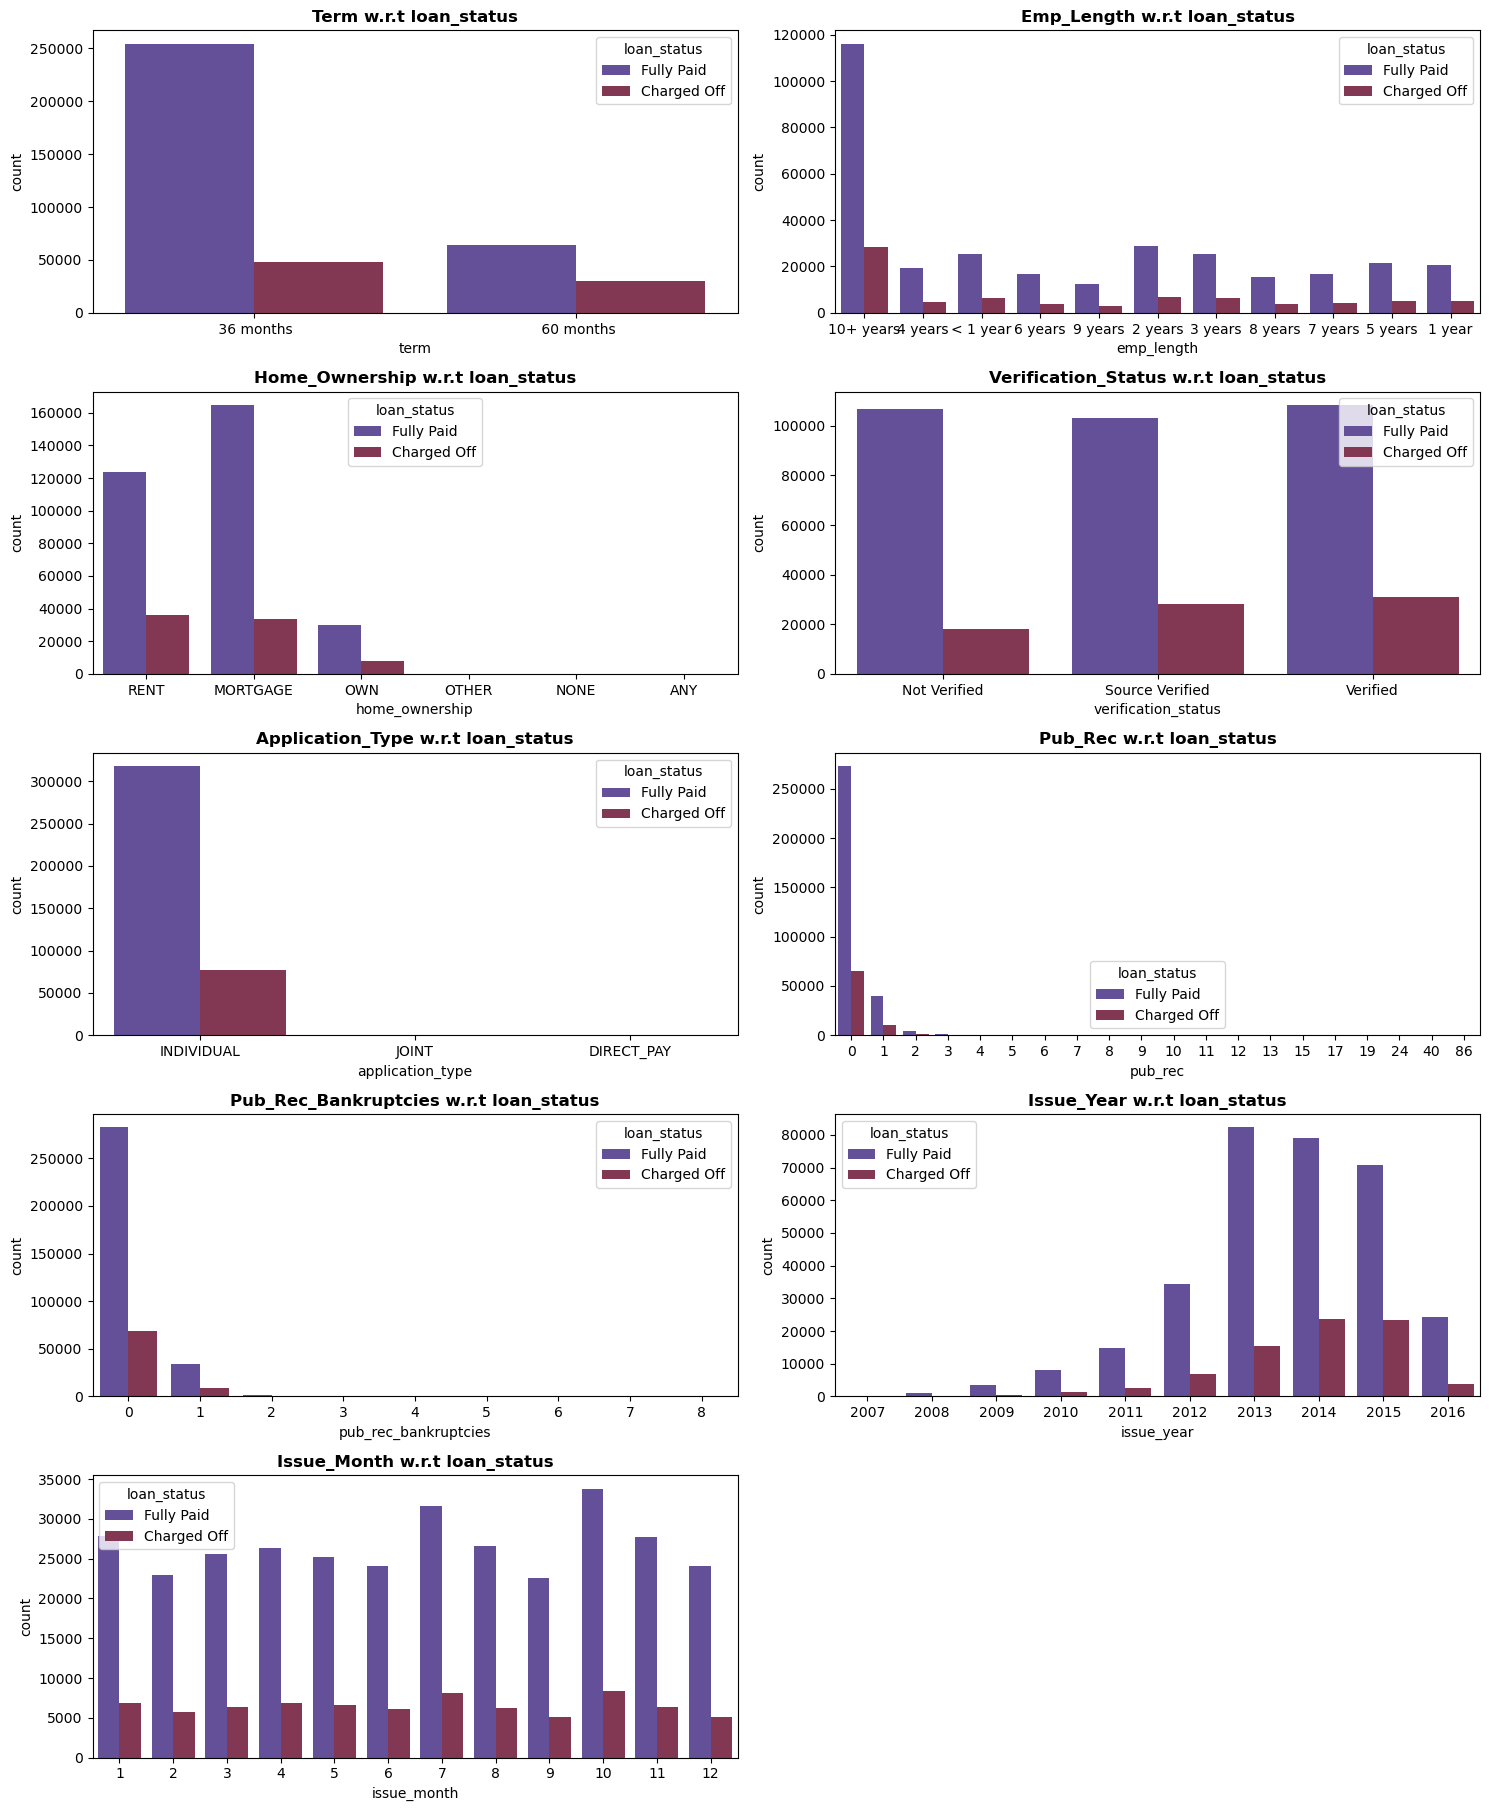

In [66]:
#plotting countplot for some categoriacal variable w.r.t loan_status
cols=['term','emp_length', 'home_ownership','verification_status','application_type', 'pub_rec',
     'pub_rec_bankruptcies', 'issue_year', 'issue_month']
plt.figure(figsize=(15,25),dpi=100)
n=1
for i in cols:
    plot=plt.subplot(7,2,n)
    n+=1
    sns.countplot(x=df1[i], hue=df1['loan_status'] ,palette='twilight')
    plt.title(f'{i.title()} w.r.t loan_status',weight='bold')
    plt.tight_layout()

**INFERENCE:**

1. Most of the Borrowers who choose for `60 month` term for their loan repayment have fully paid their loan, also the **no of defaulters** are less comapred to the borrowers who choose `36 month` term for their loan repayment. 


2. Borrowers with `emp lenth >10 years` have fully paid their Loan, and also the number of defaulters  comapare to other emp_lenth is more in this category. emp_lenth with `9 years` have less number of defaulters comapare to others.


3. Borrowers who shows their home_ownership as mortage(loan running on house) has mostly fully paid the loans comapre to others rent and owned house.Borrwoers with rented house has more no of defaulters and borrowers with own house has less no of defaulters.


4. pub rec of bankrupties has no such effect on loan status.



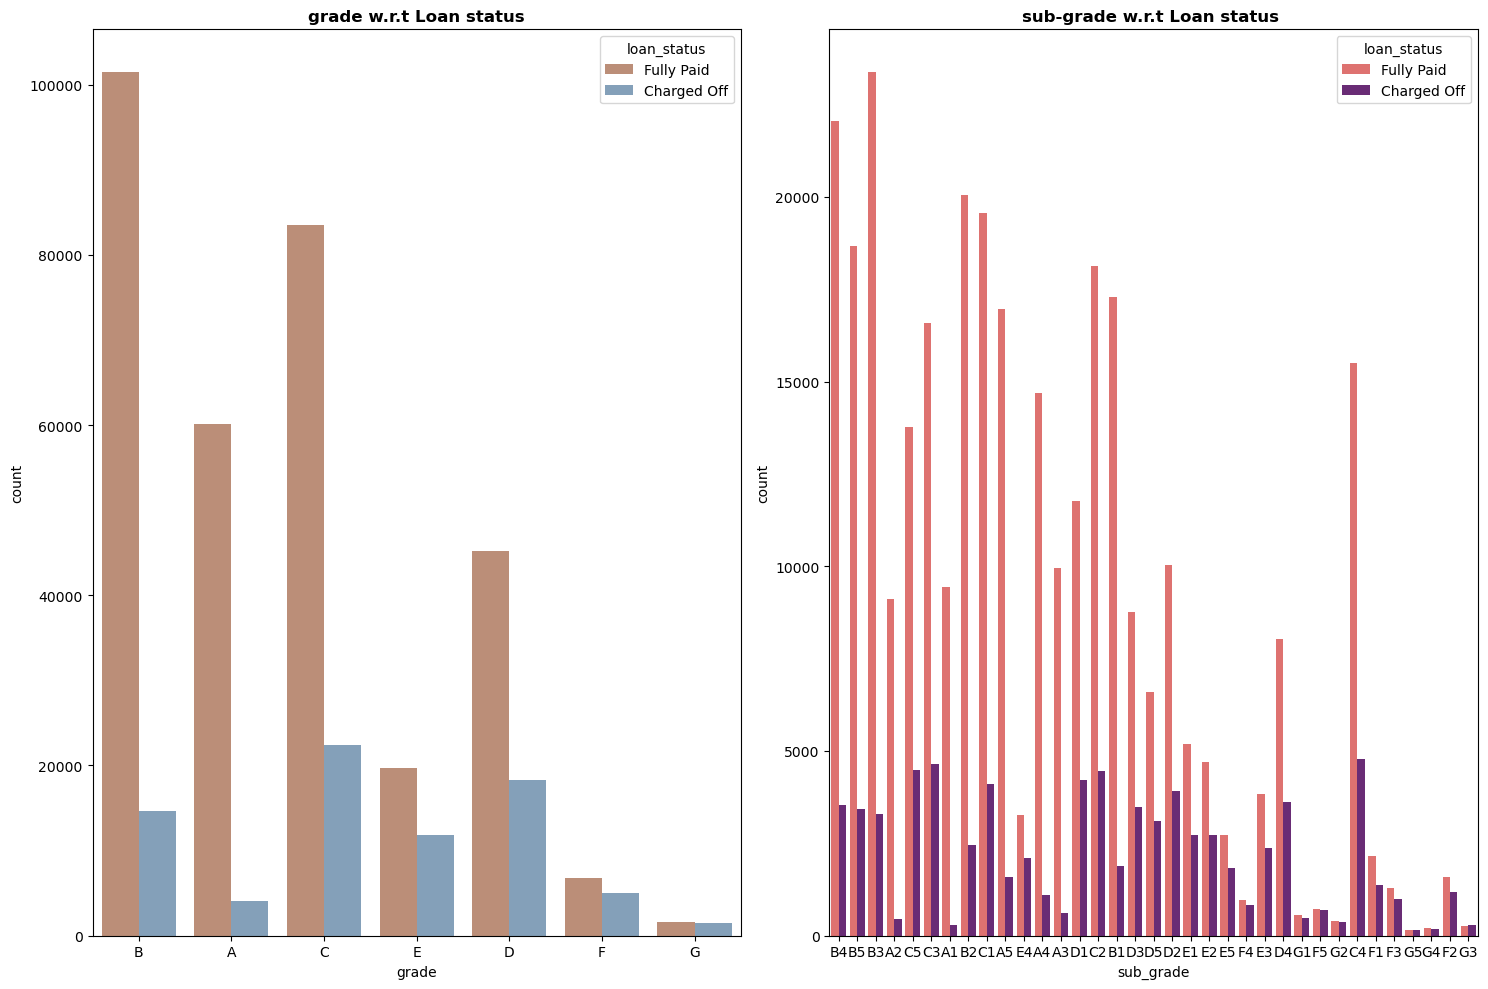

In [67]:
#plotting countplot to visualize grade and subgrade w.r.t loan status
plt.figure(figsize=(15,10),dpi=100)
plt.subplot(1,2,1)
sns.countplot(x=df1['grade'] ,hue=df1['loan_status'] , palette='twilight_shifted_r')
plt.title("grade w.r.t Loan status",weight='bold')
plt.subplot(1,2,2)
sns.countplot(x=df1['sub_grade'] ,hue=df1['loan_status'],palette='magma_r')
plt.title("sub-grade w.r.t Loan status ",weight='bold')
plt.tight_layout()

**Inference:**

1. Most of Loan Disbursed in `B grade` has been fully paid ,followed by `C grade` and `A-grade`. we can also verify it by `B-subgrade`, `C sub-grade` and `A sub-grade`.


2. `C grade` has most no of defaulters , followed by `D grade` and `B grade`.


3. Loan graded `A` has less number of defaulters(**good repayment**)


3. `F and G` subgrades loans are not recovered well.

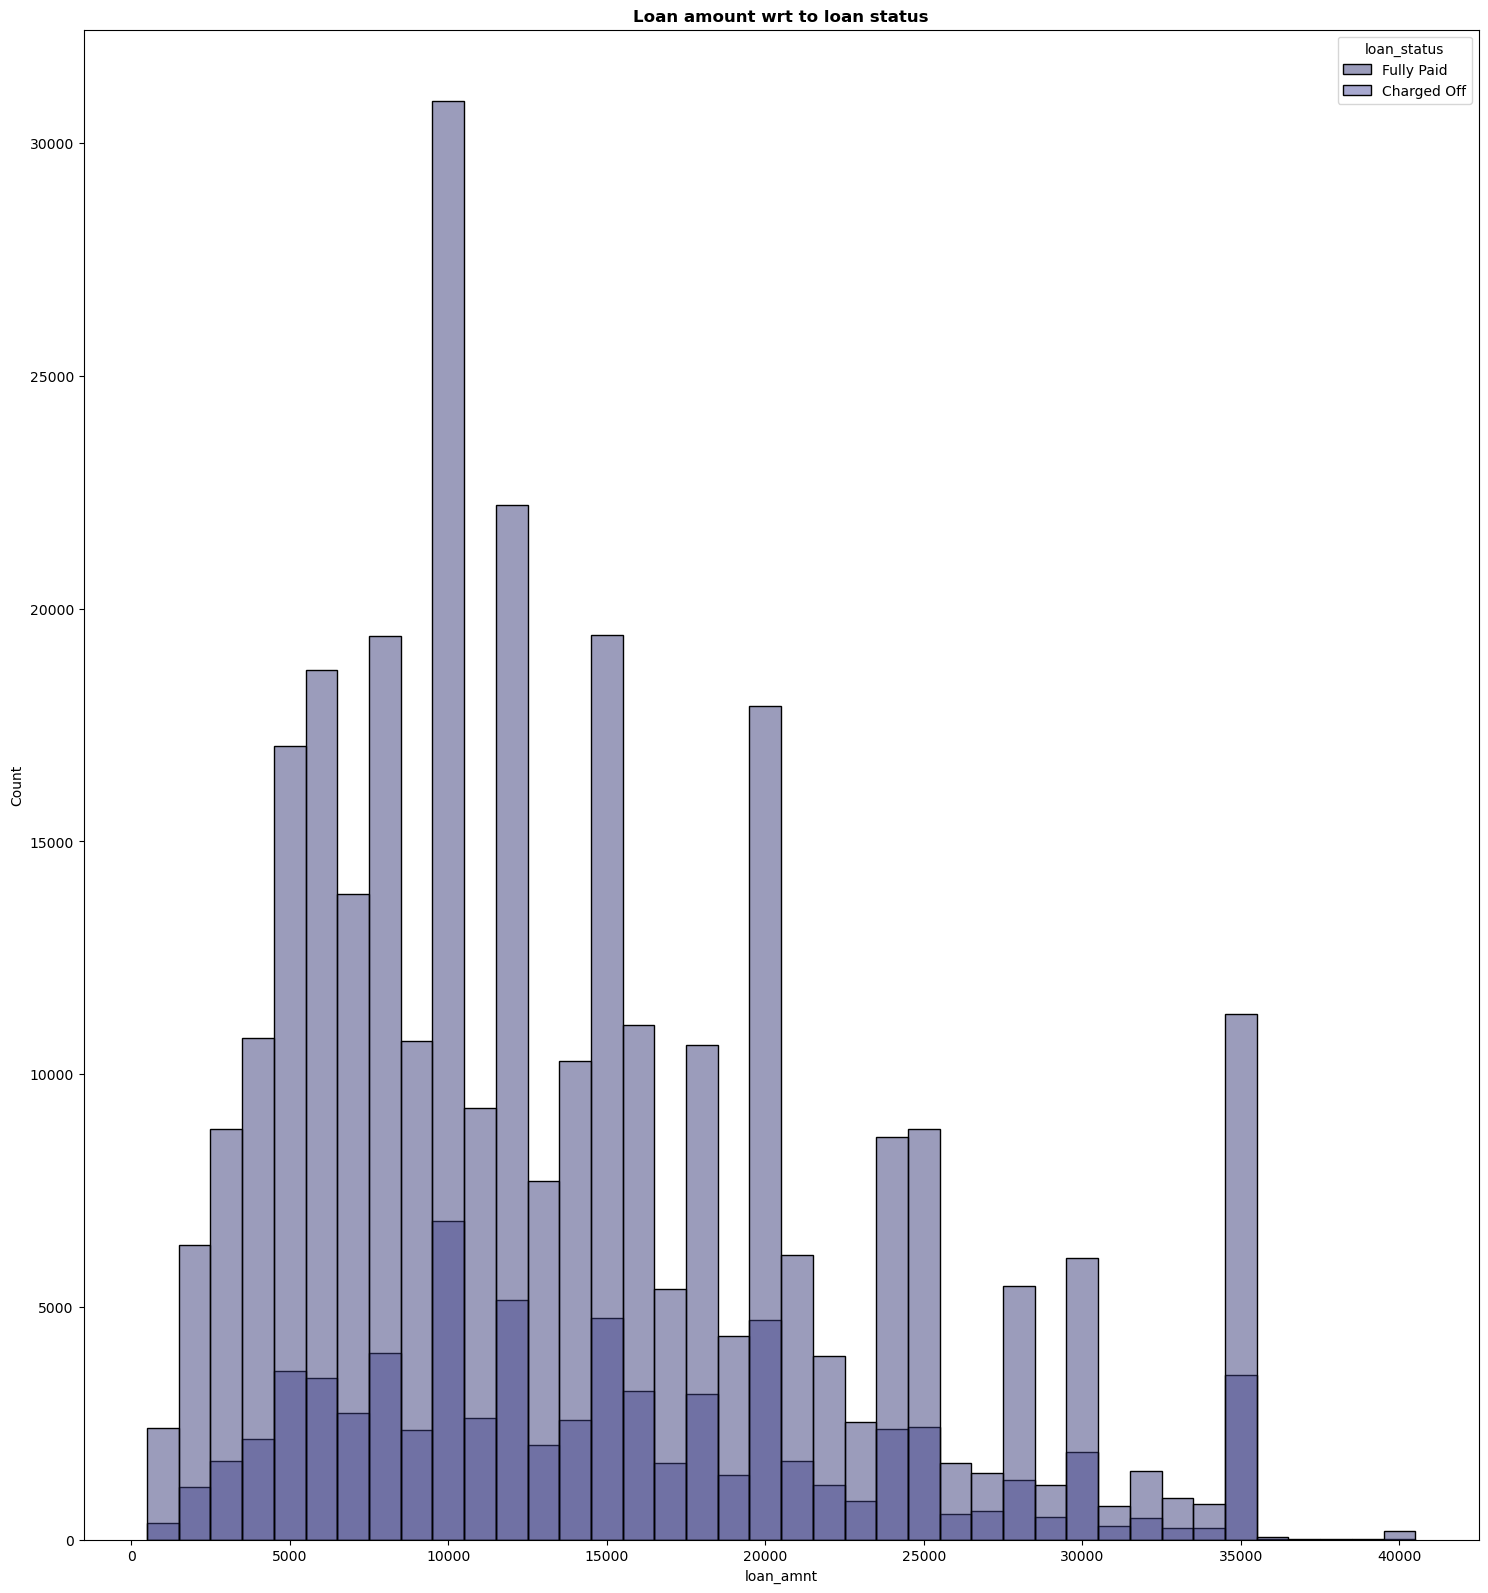

In [68]:
#analizing loan amount w.r.t to loan status
plt.figure(figsize=(18,20),dpi=100)
sns.histplot(x=df1['loan_amnt'],hue=df1['loan_status'],binwidth=1000,palette='tab20b')
plt.title('Loan amount wrt to loan status',weight='bold')
plt.show()

**INSIGHTS:** Most of the Borrowers who took loan between amount `5000 $- 10000 $` have fully paid their loan, the borrowers who took loan between amount `10000 $-15000 $` have more number of defaulters compare to other amounts.

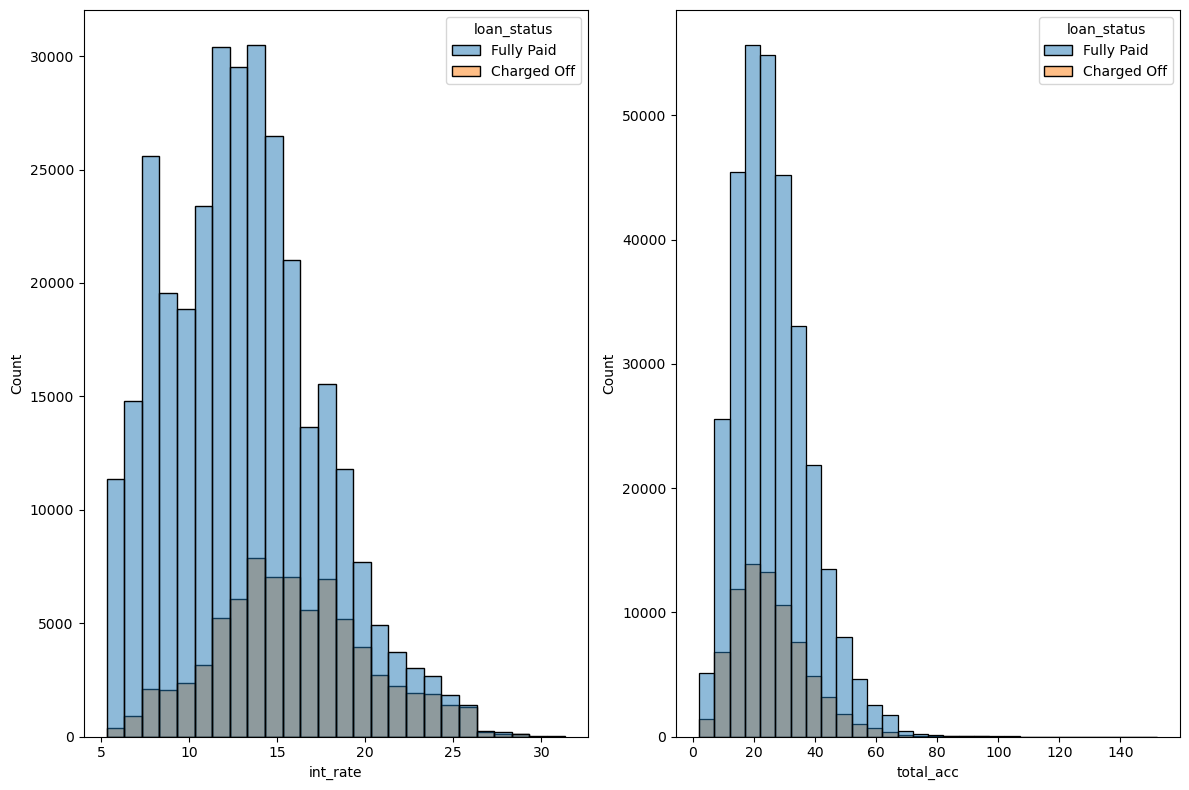

In [69]:
plt.figure(figsize=(12,8),dpi=100)
plt.subplot(1,2,1)
sns.histplot(x=df1['int_rate'],hue=df1['loan_status'],binwidth=1)
plt.subplot(1,2,2)
sns.histplot(x=df1['total_acc'],hue=df1['loan_status'],binwidth=5)
plt.tight_layout()


**INSIGHTS:**

1. For int_rest between `10% to 15%` most of the borrowers fully paid their loan.
for `15% to 20%` the number of defaulters are more coamparing to other.


2. For Total_account*( number of credit lines currently in the borrowers credit file)* between `20 to 15` most of the borrowers fully paid their loan.
also in this range the number of defaulters are more comapare to other total account range.


--The number of Defaulters are less between `40 to 60` total number of account.

# 🙌Multivariate Analysis

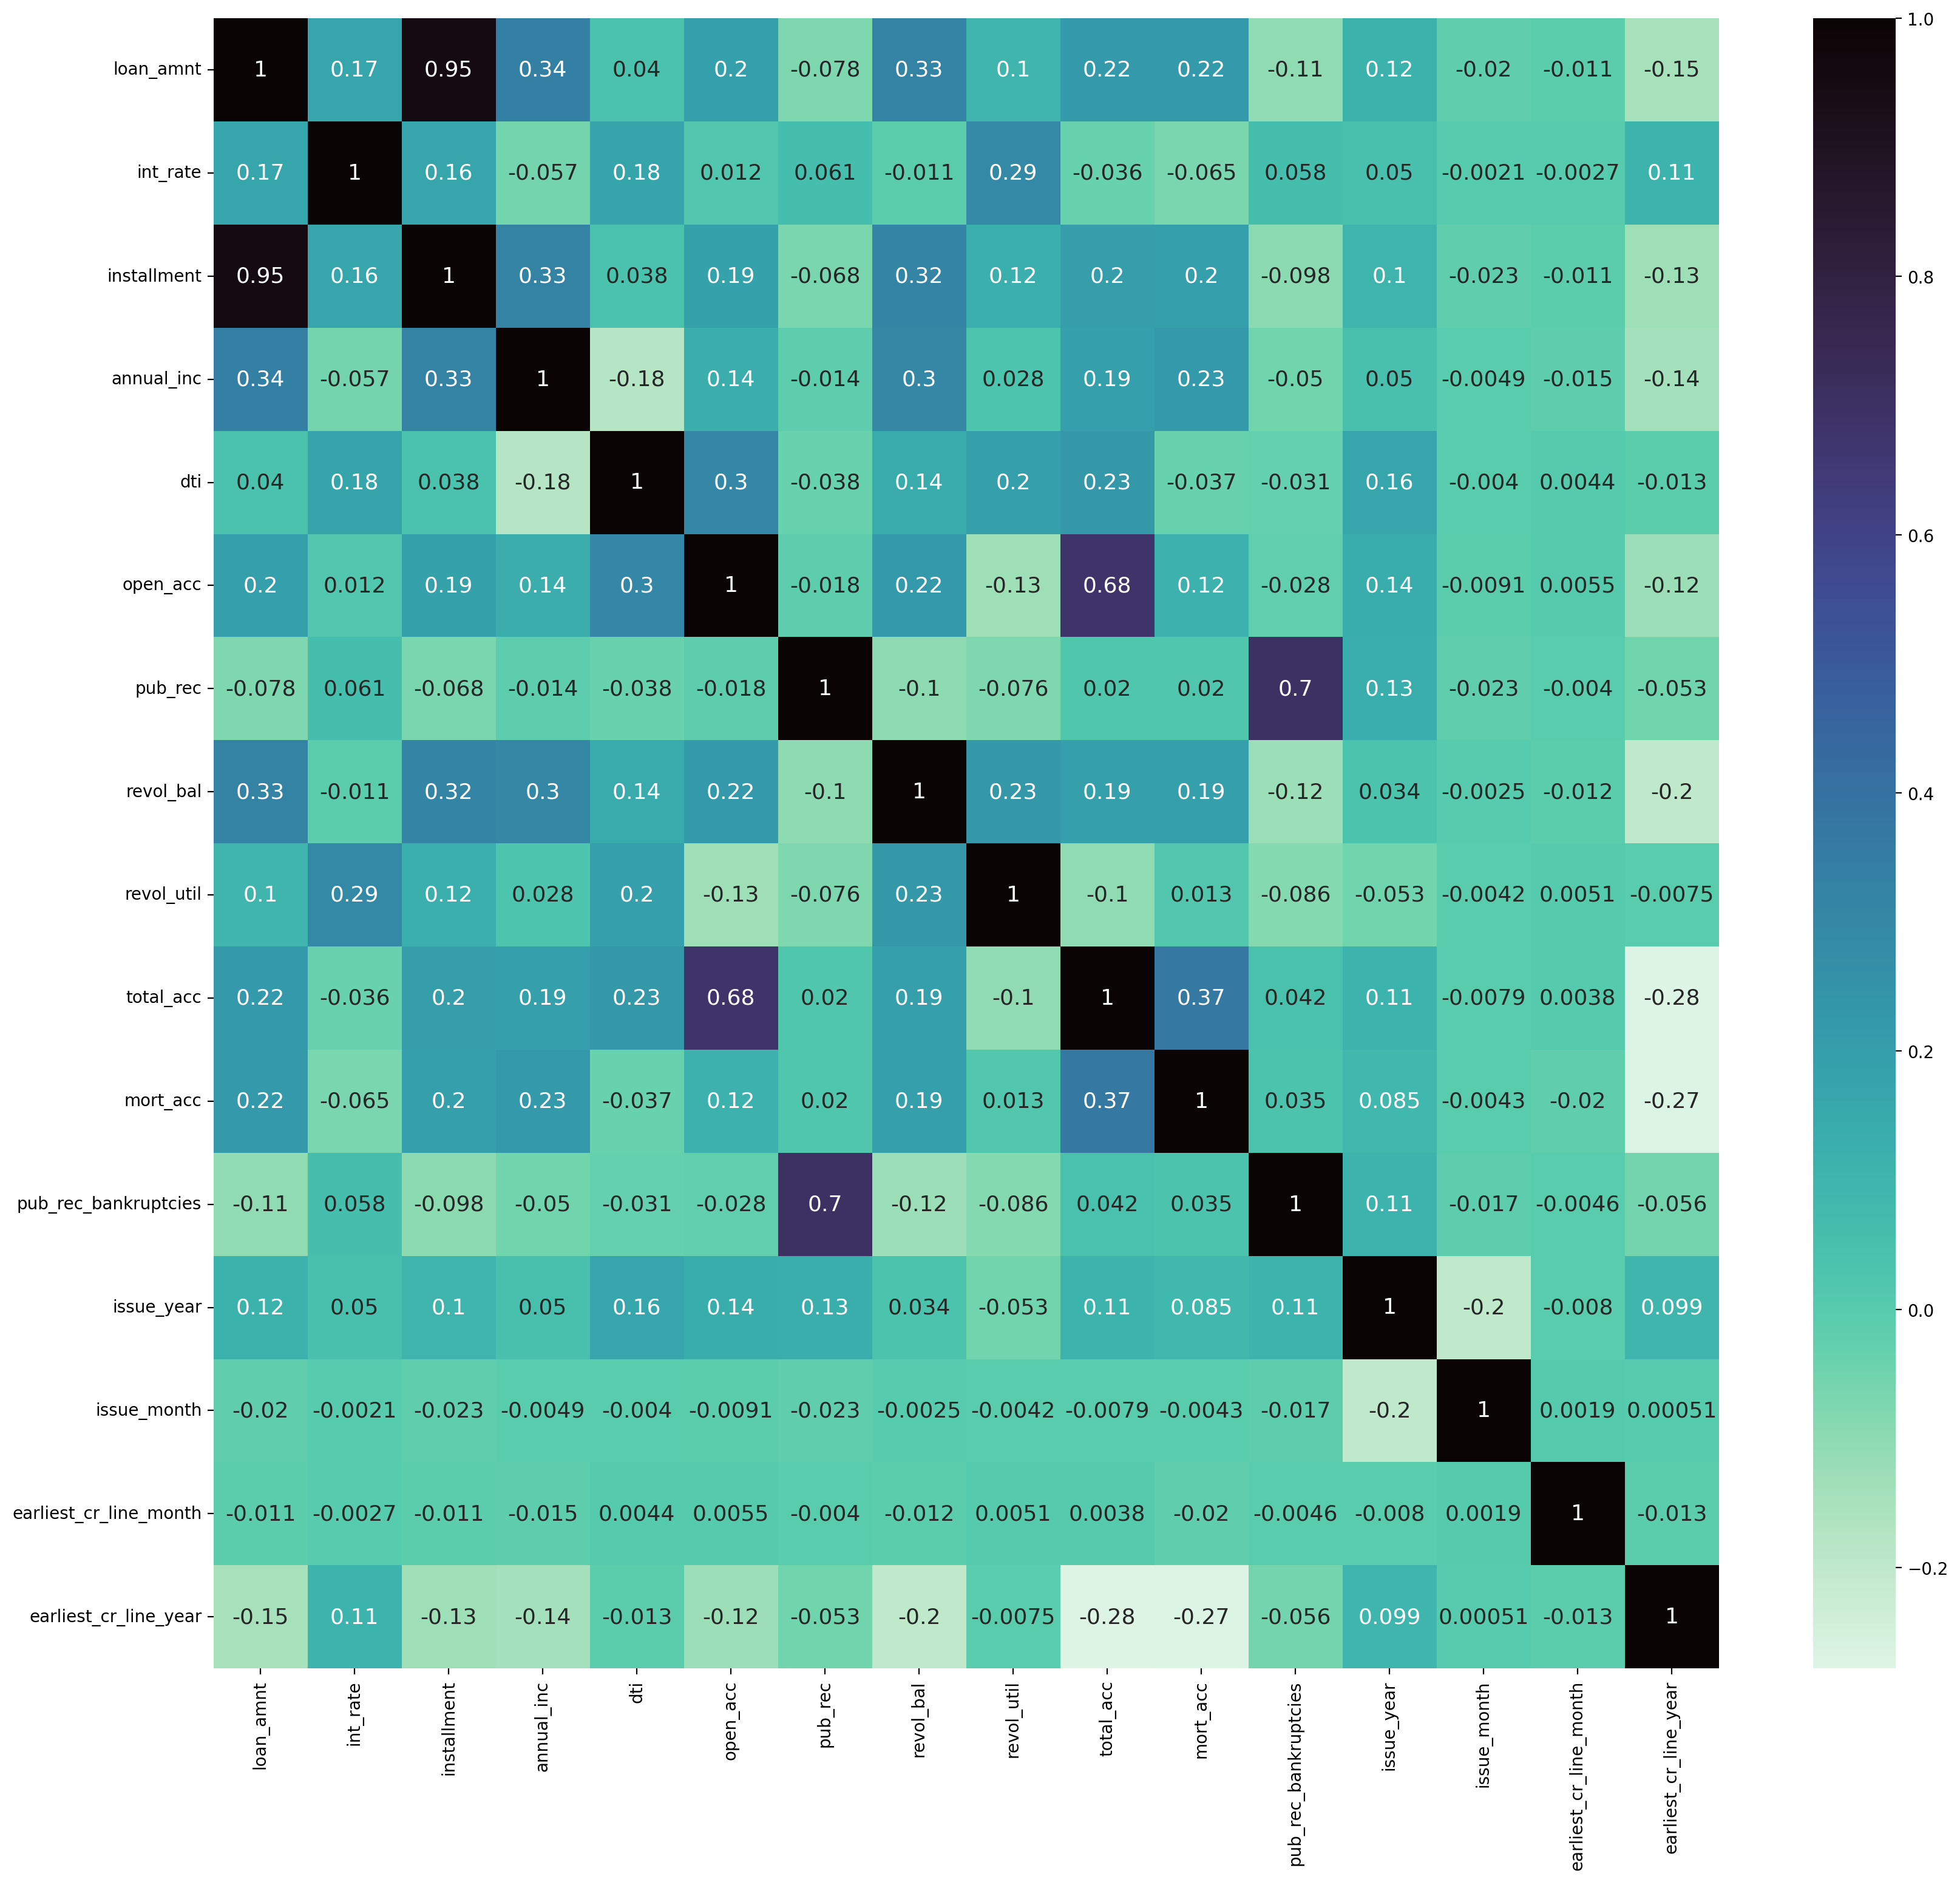

In [70]:
#plotting heatmap for checking the correlation between numerical variables i.e Multi-collinearity
plt.figure(figsize=(20,18),dpi=200)
sns.heatmap(df1.corr(),annot=True,cmap='mako_r',annot_kws={'size':13})
plt.show()

In [71]:
df2=df1.select_dtypes(include='number')

In [72]:
for ind in range(len(df2.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
    vif["Features"] = df2.columns

In [73]:
vif

,VIF_Factor,Features
0,44.731032,loan_amnt
1,12.436999,int_rate
2,44.830828,installment
3,3.197300,annual_inc
4,7.196420,dti
5,12.500077,open_acc
6,2.194314,pub_rec
7,2.146500,revol_bal
8,7.510839,revol_util
9,13.070386,total_acc


**calculating total loan amount distributed in each grade and subgrade.**

In [74]:
#calculating total loan amount distributed in each grade and subgrade.
sum_loan_amt=df1.groupby(by=['grade','sub_grade'])[['loan_amnt']].sum()
sum_loan_amt.reset_index(inplace=True ,drop=False)

In [75]:
sum_loan_amt.head()

,grade,sub_grade,loan_amnt
0,A,A1,125263800.0
1,A,A2,120174125.0
2,A,A3,140169275.0
3,A,A4,212548000.0
4,A,A5,255193925.0


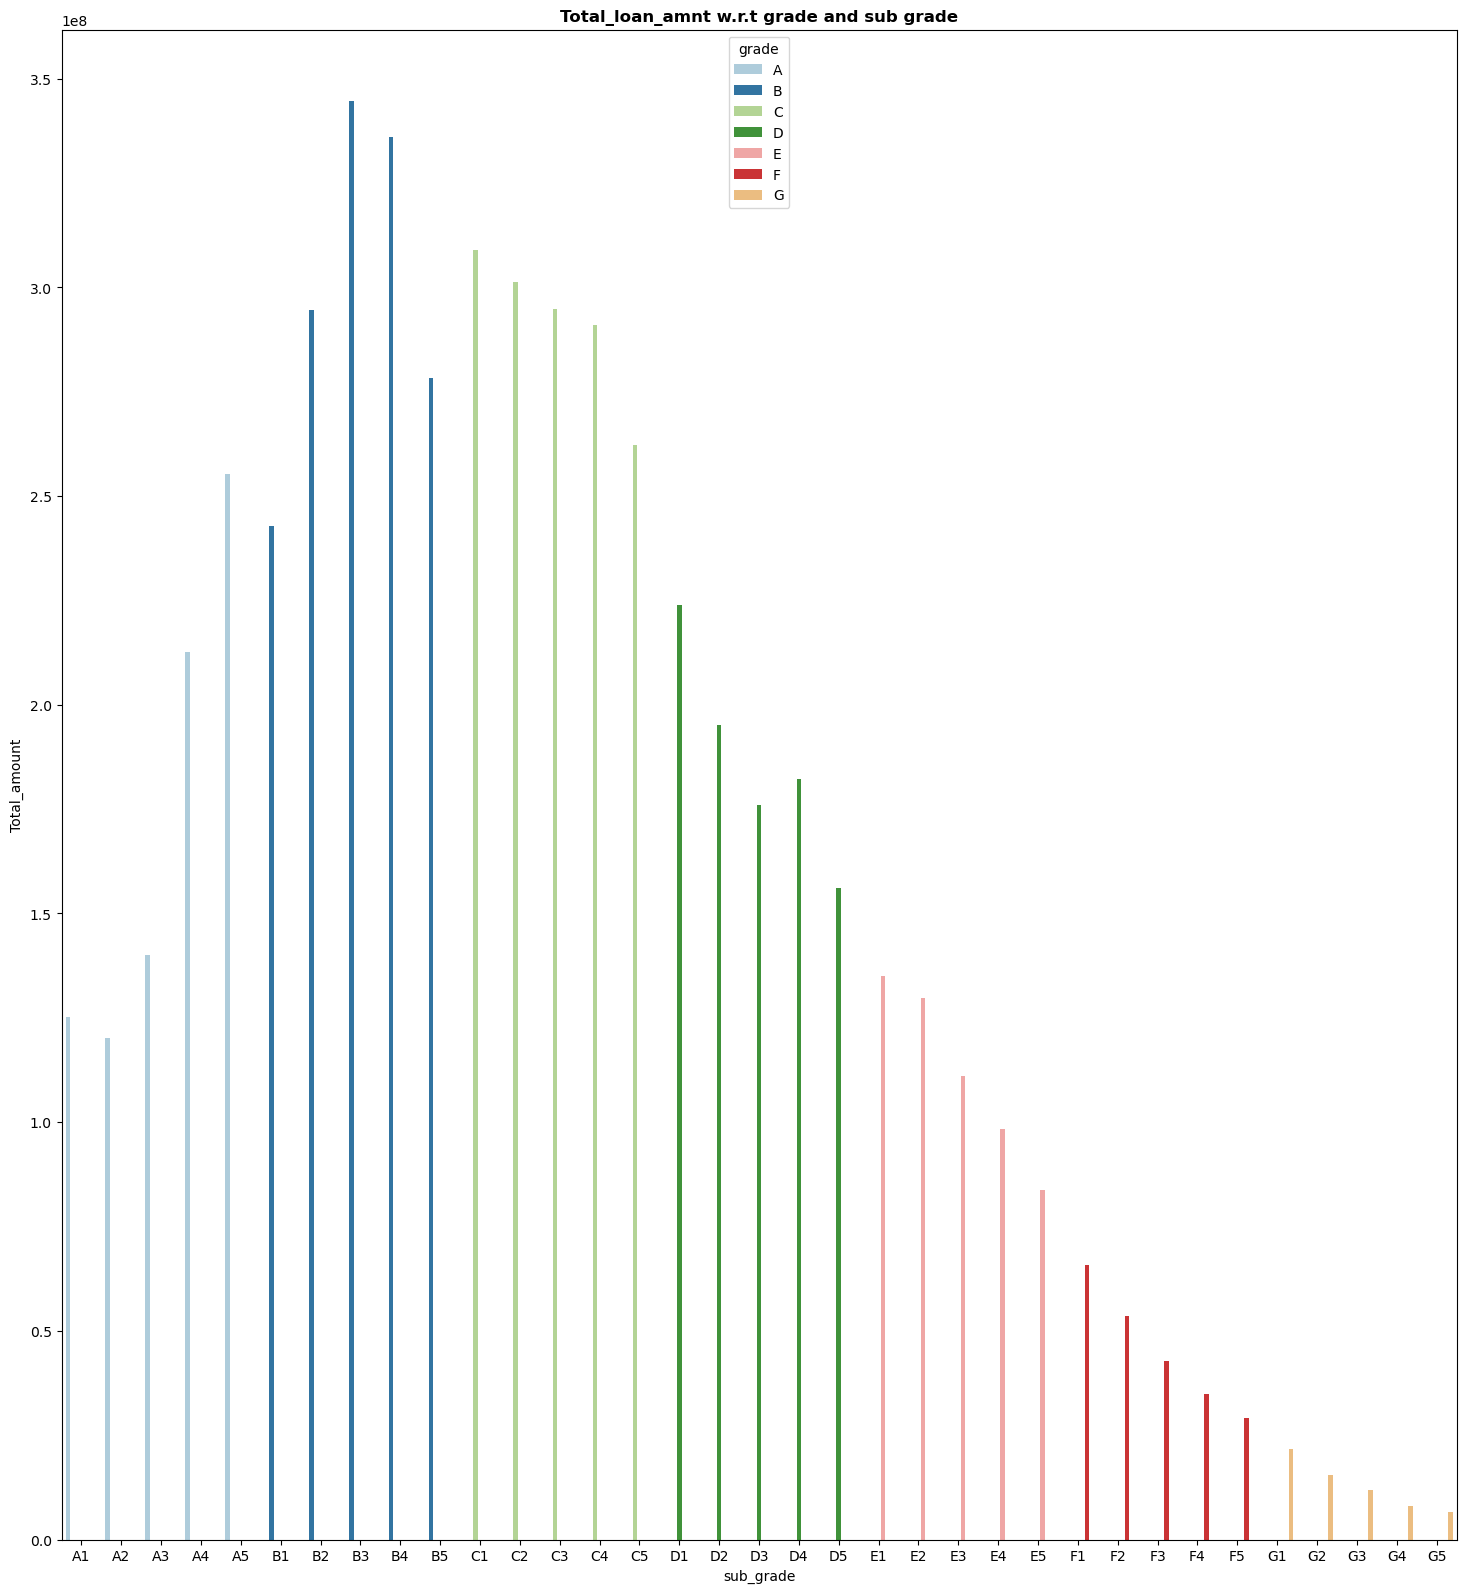

In [76]:
plt.figure(figsize=(18,20),dpi=100)
sns.barplot(data=sum_loan_amt , x='sub_grade',y='loan_amnt',hue='grade',palette='Paired')
plt.title('Total_loan_amnt w.r.t grade and sub grade',weight='bold')
plt.ylabel('Total_amount')
plt.show()

**INSIGHTS:** from the above barplot we can visualize that most of the loan(total amount) distributed in B grade.


-- for better visualization and insights lets plot pie chart for percentage distribution of loan in each subgrade.

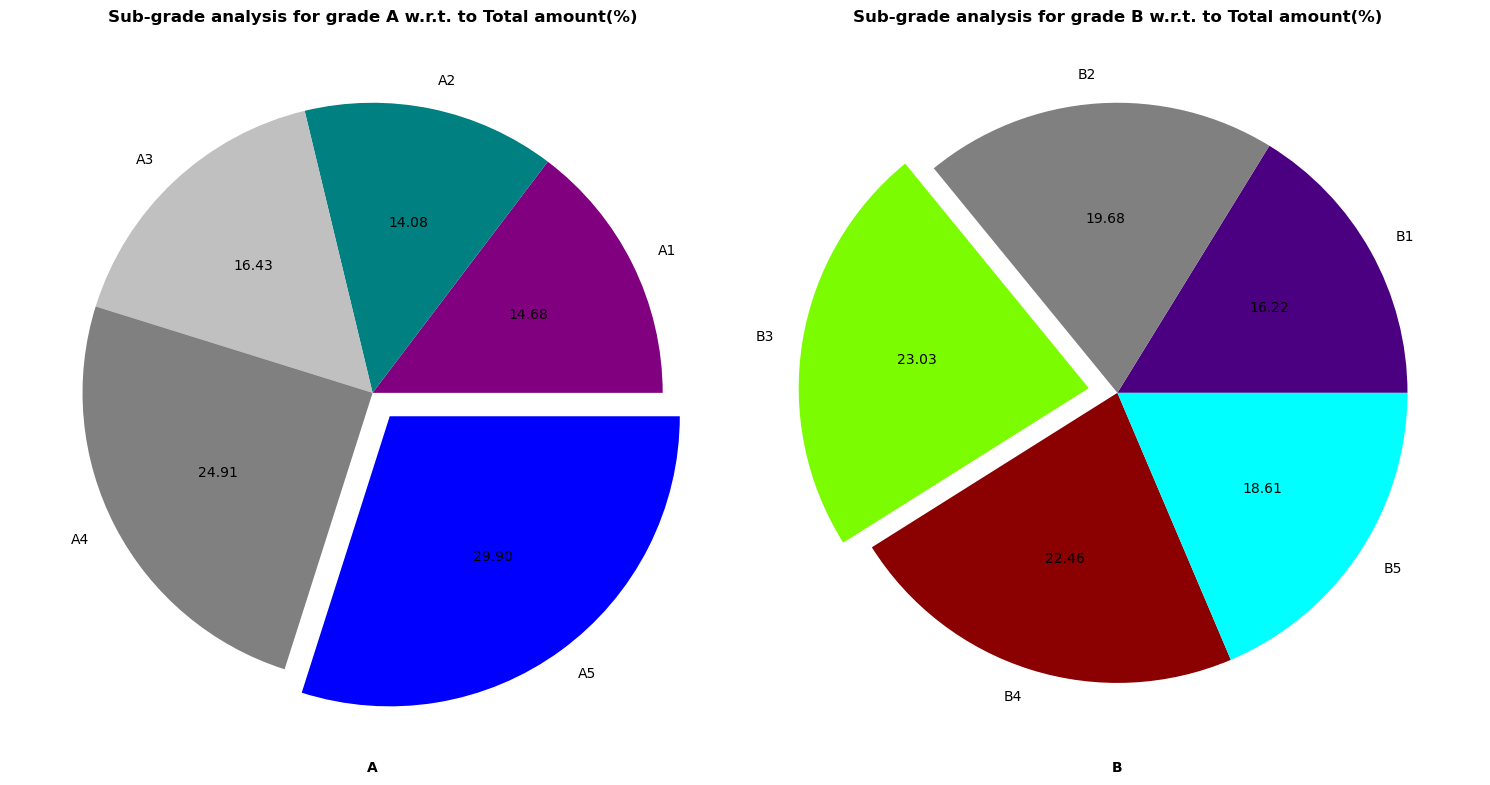

In [77]:
#plotting pie chart for better visualization
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(1,2,1)
plt.pie(data=sum_loan_amt[sum_loan_amt['grade']=='A'],x='loan_amnt',autopct='%.2f',labels=['A1','A2','A3','A4','A5'],
        colors=["purple","teal","Silver",'gray','blue'],explode=(0.0,0.0,0.0,0.0,0.1))
plt.title('Sub-grade analysis for grade A w.r.t. to Total amount(%)',weight='bold')
plt.xlabel('A',weight='bold')
plt.subplot(1,2,2)
plt.pie(data=sum_loan_amt[sum_loan_amt['grade']=='B'],x='loan_amnt',autopct='%.2f',labels=['B1','B2','B3','B4','B5'],
       colors=["indigo","Grey",'lawnGreen','DarkRed','aqua'],explode=(0.0,0.0,0.1,0.0,0.0))
plt.title('Sub-grade analysis for grade B w.r.t. to Total amount(%)',weight='bold')
plt.xlabel('B',weight='bold')
plt.tight_layout()

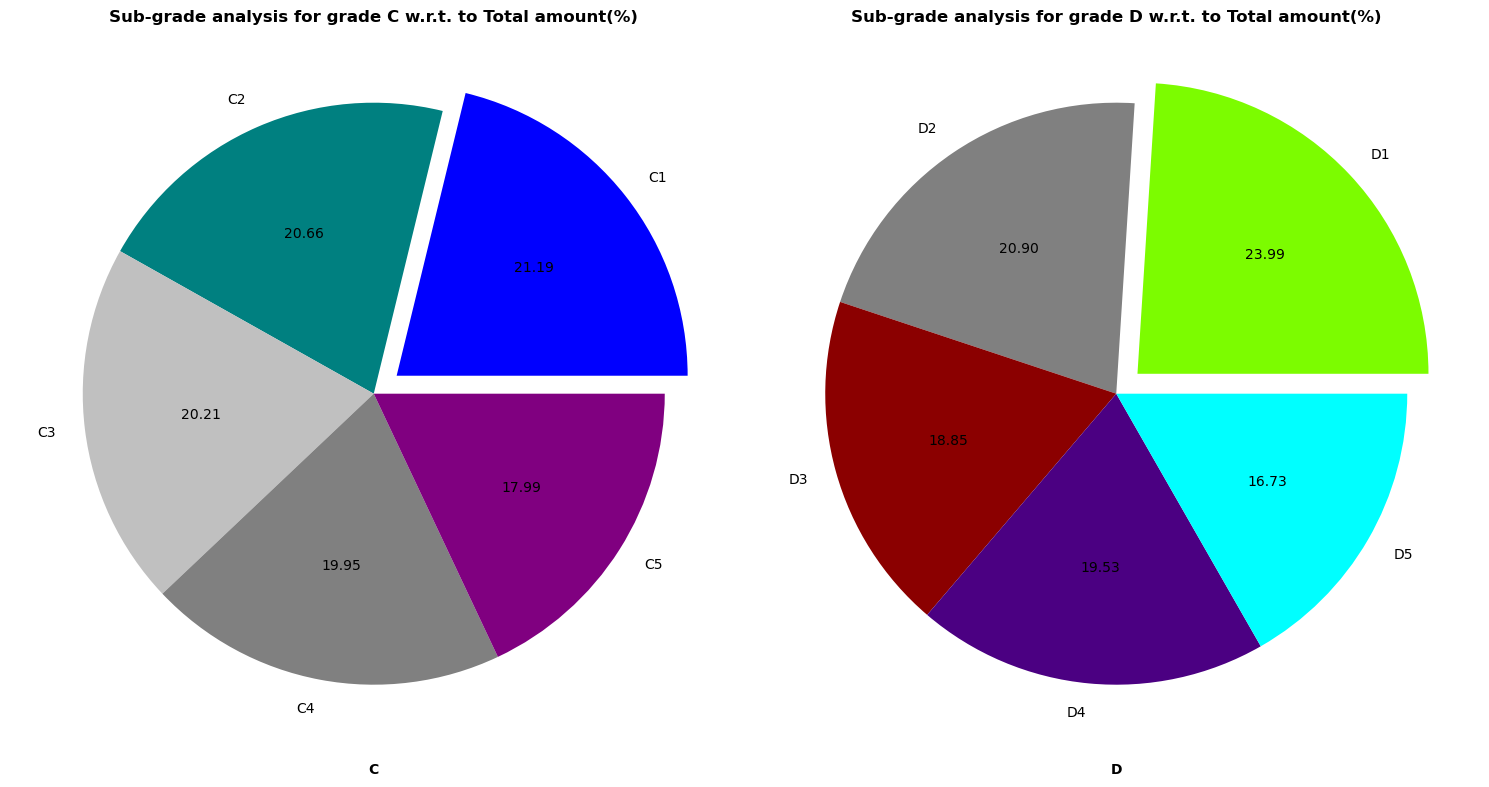

In [78]:
#plotting pie chart for better visualization
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(1,2,1)
plt.pie(data=sum_loan_amt[sum_loan_amt['grade']=='C'],x='loan_amnt',autopct='%.2f',labels=['C1','C2','C3','C4','C5'],
        colors=["blue","teal","Silver",'gray','purple'],explode=(0.1,0.0,0.00,0.00,0.00))
plt.title('Sub-grade analysis for grade C w.r.t. to Total amount(%)',weight='bold')
plt.xlabel('C',weight='bold')
plt.subplot(1,2,2)
plt.pie(data=sum_loan_amt[sum_loan_amt['grade']=='D'],x='loan_amnt',autopct='%.2f',labels=['D1','D2','D3','D4','D5'],
       colors=["lawnGreen","Grey",'DarkRed','indigo','aqua'],explode=(0.1,0.0,0.0,0.0,0.0))
plt.title('Sub-grade analysis for grade D w.r.t. to Total amount(%)',weight='bold')
plt.xlabel('D',weight='bold')
plt.tight_layout()

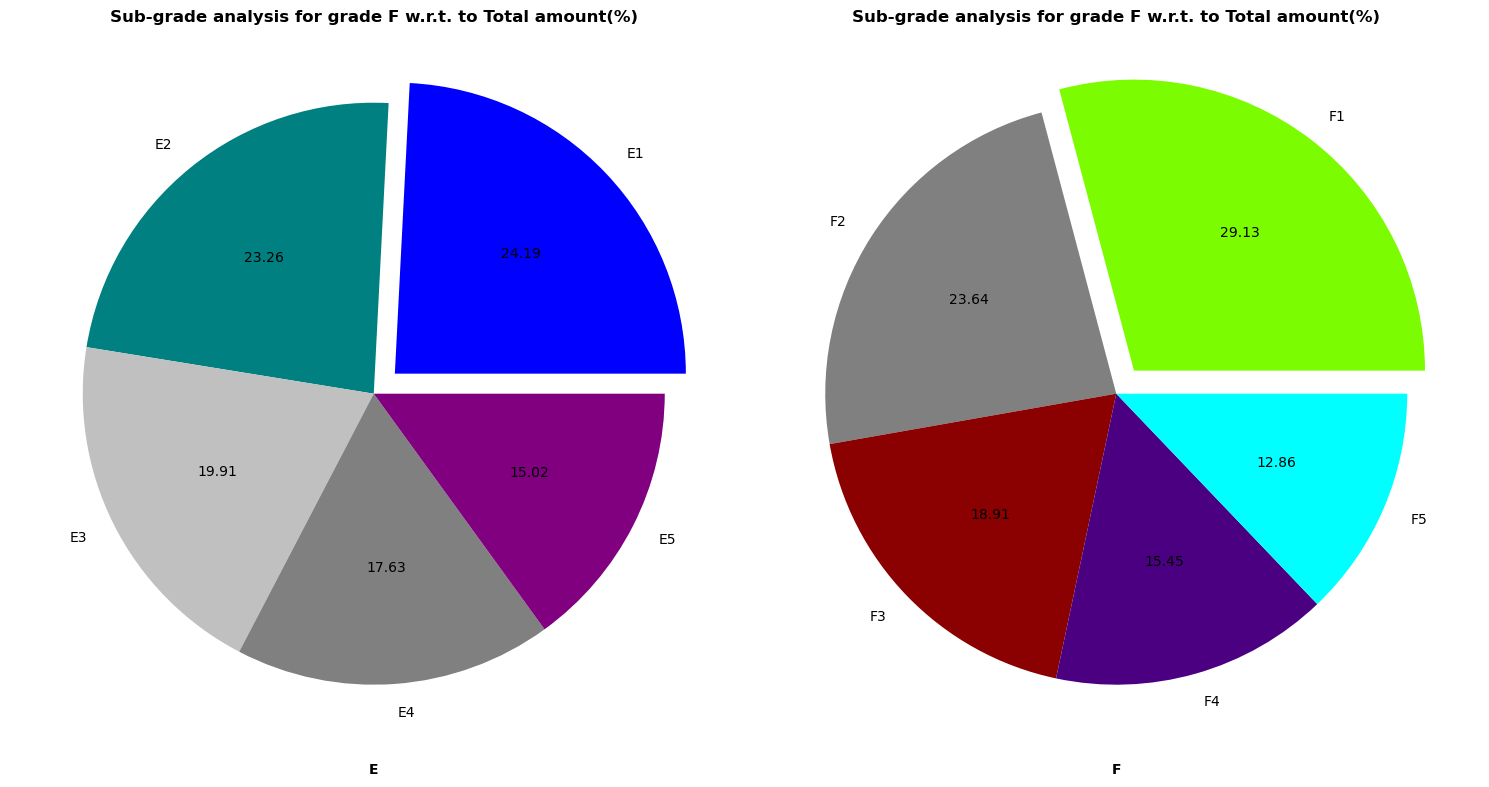

In [79]:
#plotting pie chart for better visualization
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(1,2,1)
plt.pie(data=sum_loan_amt[sum_loan_amt['grade']=='E'],x='loan_amnt',autopct='%.2f',labels=['E1','E2','E3','E4','E5'],
        colors=["blue","teal","Silver",'gray','purple'],explode=(0.1,0.0,0.00,0.00,0.00))
plt.title('Sub-grade analysis for grade F w.r.t. to Total amount(%)',weight='bold')
plt.xlabel('E',weight='bold')
plt.subplot(1,2,2)
plt.pie(data=sum_loan_amt[sum_loan_amt['grade']=='F'],x='loan_amnt',autopct='%.2f',labels=['F1','F2','F3','F4','F5'],
       colors=["lawnGreen","Grey",'DarkRed','indigo','aqua'],explode=(0.1,0.0,0.0,0.0,0.0))
plt.title('Sub-grade analysis for grade F w.r.t. to Total amount(%)',weight='bold')
plt.xlabel('F',weight='bold')
plt.tight_layout()

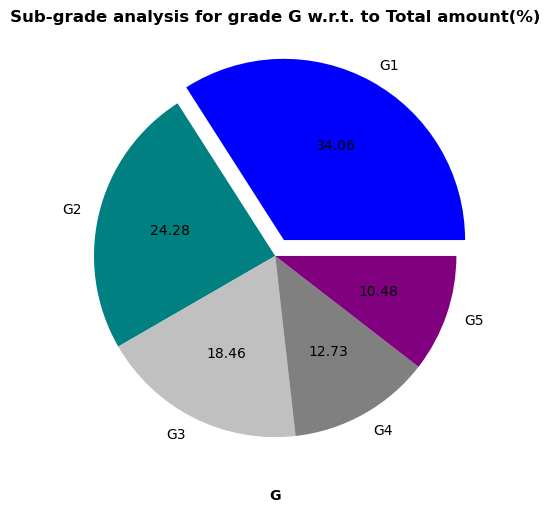

In [80]:
plt.figure(figsize=(8,6),dpi=100)
plt.pie(data=sum_loan_amt[sum_loan_amt['grade']=='G'],x='loan_amnt',autopct='%.2f',labels=['G1','G2','G3','G4','G5'],
        colors=["blue","teal","Silver",'gray','purple'],explode=(0.1,0.00,0.0,0.0,0.))
plt.title('Sub-grade analysis for grade G w.r.t. to Total amount(%)',weight='bold')
plt.xlabel('G',weight='bold')
plt.show()

**INSIGHTS:**

1. In `A grade` out of `100%`,**29.41%** loan distributed undder A5 subgrade.


2. In `B grade` out of `100%`,**23.01%** loan distributed undder B3 subgrade.


3. In `C grade` out of `100%`,**21.19%** loan distributed undder C1 subgrade.


4. In `D grade` out of `100%`,**23.99%** loan distributed undder D1 subgrade.


5. In `E grade` out of `100%`,**24.19%** loan distributed undder E1 subgrade.



6. In `F grade` out of `100%`,**29.13%** loan distributed undder F1 subgrade.



7. In `G grade` out of `100%`,**34.06%** loan distributed undder G1 subgrade.

**plotting lineplot for issue year , mort_account w.r.t loan_status**

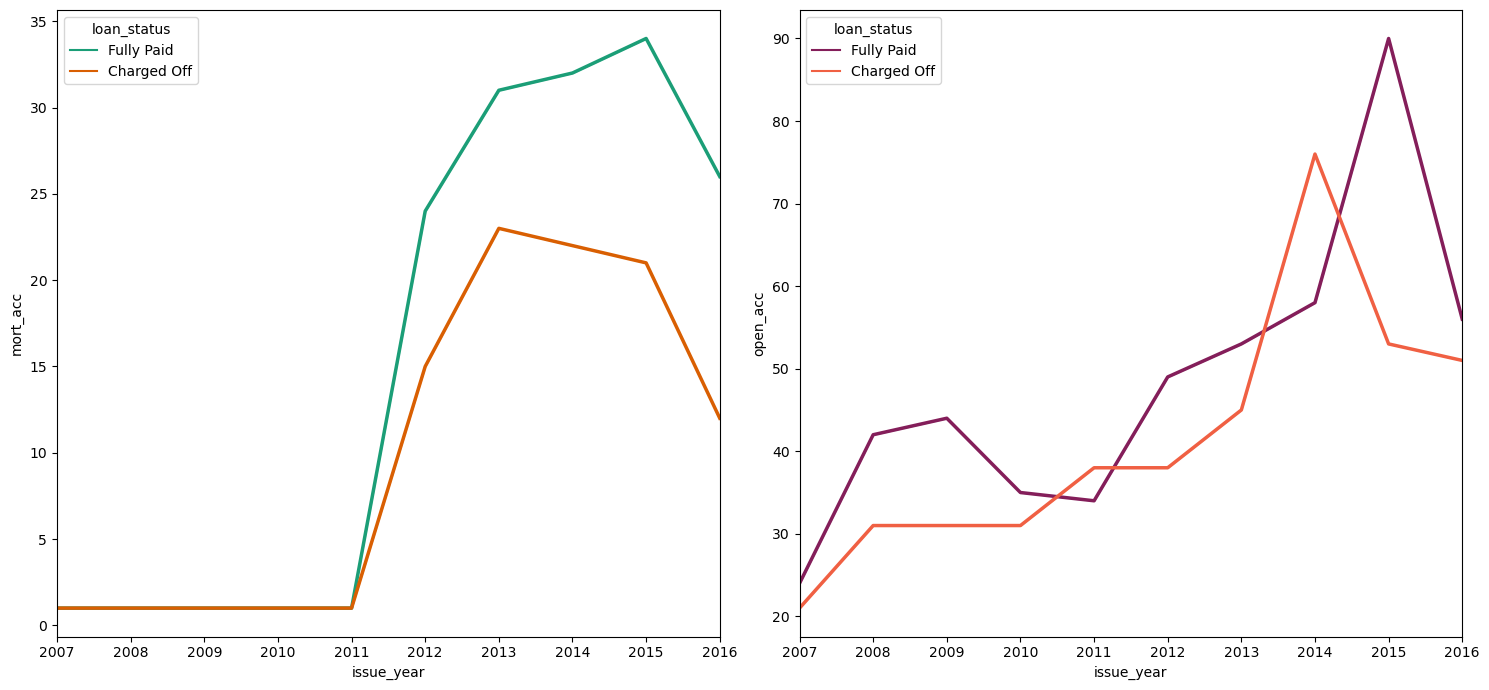

In [81]:
#plotting lineplot for issue year , mort_account w.r.t loan_status
plt.figure(figsize=(15,7),dpi=100)
plt.subplot(1,2,1)
sns.lineplot(data=df1,x='issue_year',y='mort_acc',hue='loan_status',estimator='max',ci=False,
             palette='Dark2',linewidth=2.5)
plt.xlim([2007,2016])
plt.subplot(1,2,2)
sns.lineplot(data=df1,x='issue_year',y='open_acc',hue='loan_status',estimator='max'
             ,sort=True,ci=False,palette='rocket',linewidth=2.5)
plt.xlim([2007,2016])
plt.tight_layout()

**INSIGHTS:** 

1. we can visualize that From `2007 to 2011` for `one mortage_account`, **fully_paid loan** and **charged off loan(Defaulters)** are balanced, after 2011 as the number of mortage account increases the number of `charged off loan(Defaulters)` also increses. 


2. we can visualize that as the no of `open acoounts(open credit lines)`  by the year increses `charged off loan` also increases, and also at some point **(2011 ,2014)**, its was more than the `fully paid Loans`

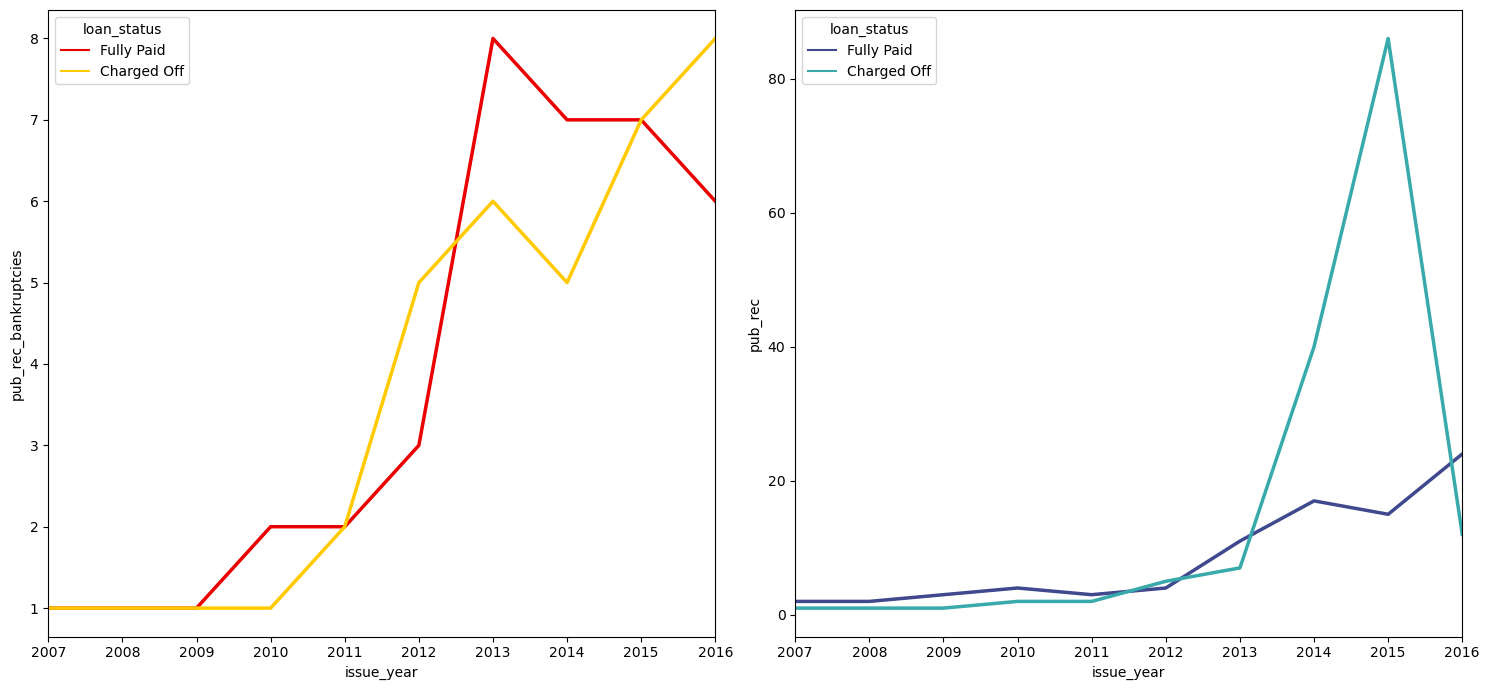

In [82]:
plt.figure(figsize=(15,7),dpi=100)
plt.subplot(1,2,1)
sns.lineplot(data=df1,x='issue_year',y='pub_rec_bankruptcies',hue='loan_status',estimator='max',ci=False,
             palette='hot',linewidth=2.5)
plt.xlim([2007,2016])
plt.subplot(1,2,2)
sns.lineplot(data=df1,x='issue_year',y='pub_rec',hue='loan_status',estimator='max',ci=False,
             palette='mako',linewidth=2.5)
plt.xlim([2007,2016])
plt.tight_layout()

**INSIGHTS:**

1. from the above line plot we can visualize that from `2007 to 2009` for **1 time record of pub_rec_bankrupties** `Fully paid and charged off loans` are Balanced, after 2009 as the no of public record of bankrupties increases charged off Loans(Defdaulters) also increses.


2. from the above line plot we can visualize that from `2007 to 2012` for **1 time record of pub_rec(Derogatory)** `Fully paid and charged off loans` are Balanced, after 2012 as the number of public record of `pub_rec(Derogatory)` increases charged off Loans(Defdaulters) also increses and it becomes **greater than the full paid loans.**

#  STATSTICAL ANALYSIS

# Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>


1.*Here we are check if the catagorical features are dependent on our target.<br>2.We are assuming the level of confidence as 95%*

In [83]:
# considering only catagorical variables
df_categorical=df1.select_dtypes(include=object)
df_categorical.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Fully Paid,vacation,Vacation,w,INDIVIDUAL
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Charged Off,credit_card,Credit Card Refinance,f,INDIVIDUAL


In [84]:
# sepearting the independent and target varaiables
df_categorical_features=df_categorical.drop('loan_status',axis=1)
df_target=df_categorical['loan_status']

In [85]:
for i in df_categorical_features.columns:
    
    print('\nfor: ',i)
    
    print('\nThe null and alternative hypothesis is:')
    print(' ')
    print('H0: The variables {} and loan_status are independent'.format(i))
    print('H1: The variables {} and loan_status are not independent'.format(i))
    print('')
    
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

    print("Test statistic:", test_stat)
    print("p-value:", p)
    
    if p > 0.05:
        print('The above output shows that the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} and loan_status are independent.'.format(i))
    else:
        print('The above output shows that the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} and loan_status are dependent.'.format(i))        


for:  term

The null and alternative hypothesis is:
 
H0: The variables term and loan_status are independent
H1: The variables term and loan_status are not independent

Test statistic: 11887.05638598066
p-value: 0.0
The above output shows that the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables term and loan_status are dependent.

for:  grade

The null and alternative hypothesis is:
 
H0: The variables grade and loan_status are independent
H1: The variables grade and loan_status are not independent

Test statistic: 26338.105900517643
p-value: 0.0
The above output shows that the p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables grade and loan_status are dependent.

for:  sub_grade

The null and alternative hypothesis is:
 
H0: The variables sub_grade and loan_status are independent
H1: The variables sub_grade and loan_status are not independent

Test statistic: 27560.40566062512
p-value: 0

In [86]:
print('The dependent categorical variable found after Chi-Square Test for Independence are:')
print('')
for i in df_categorical_features.columns:
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    if p < 0.05:
        print(i)

The dependent categorical variable found after Chi-Square Test for Independence are:

term
grade
sub_grade
emp_length
home_ownership
verification_status
purpose
initial_list_status
application_type


In [87]:
print('The independent categorical variable found after Chi-Square Test for Independence are:')
print('')
for i in df_categorical_features.columns:
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    if p > 0.05:
        print(i)

The independent categorical variable found after Chi-Square Test for Independence are:

emp_title
title


In [88]:
## Checking significance for numerical features.

In [89]:
df_num=df1.select_dtypes(include=np.number)
df_target=df_categorical['loan_status']
df_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,11.44,329.48,117000.0,26.24,16,0,36369.0,41.8,25,0,0,2015,1,6,1990
1,8000.0,11.99,265.68,65000.0,22.05,17,0,20131.0,53.3,27,3,0,2015,1,7,2004
2,15600.0,10.49,506.97,43057.0,12.79,13,0,11987.0,92.2,26,0,0,2015,1,8,2007
3,7200.0,6.49,220.65,54000.0,2.60,6,0,5472.0,21.5,13,0,0,2014,11,9,2006
4,24375.0,17.27,609.33,55000.0,33.95,13,0,24584.0,69.8,43,1,0,2013,4,3,1999


In [90]:
# importing jarque_bera function from the scipy.stats lib

The null and alternative hypothesis for jarque_bera is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data is normally distributed. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data is not normally distributed. </strong></p>

Assuming the level of confidence as 95%

In [91]:
# defining a function to get if both sets of 
def get_jarque_bera(Charged_Off_set,Fully_Paid_set):
    stat_co,p_co=jarque_bera(Charged_Off_set)
    stat_fp,p_fp=jarque_bera(Fully_Paid_set)
    if p_co > 0.05 and p_fp > 0.05:
        print('Since the pvalue of both the Charged_Off_set and Fully_Paid_set are greater then 0.05, we donot have enough evidence to reject the null hypothesis for both')
        print('Both sets are normaly distributed')
    elif p_co < 0.05 and p_fp < 0.05: 
        print('Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis')
        print('Both sets are not normaly distributed')
    elif p_co < 0.05 or p_fp < 0.05: 
        print('Since the pvalue of either the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis of the variable with p_value < 0.05 ')
        print('Either one of sets is not normaly distributed')


#### we will saperate each numerical column into two sets according to the target variable which are in this case Charged_Off and Fully_Paid

In [92]:
for i in df_num.columns:
    print('Checking the normality of the two separated sets of {} column according to target'.format(i))
    print()
    Charged_Off_set=df1[df1['loan_status']=='Charged Off'][i]
    Fully_Paid_set=df1[df1['loan_status']=='Fully Paid'][i]
    print(get_jarque_bera(Charged_Off_set,Fully_Paid_set))

Checking the normality of the two separated sets of loan_amnt column according to target

Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking the normality of the two separated sets of int_rate column according to target

Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking the normality of the two separated sets of installment column according to target

Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Checking the normality of the two separated sets of annual_inc column according to target

Since the pvalue of both the Charged_Off_set and Fully_Paid_set are lesser then 0.05, we reject the null hypothesis
Both sets are not normaly distributed
None
Ch

**Inference:**
1. we can see that non of the sets of the numerical features separated by the target variables are normally distributed,therefore we can opt for `kruskal wallis test` to check its dependence on the target variable

The null and alternative hypothesis for `kruskal wallis test` is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data samples are with equal median (independent). </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data samples do not have equal median(i.e. variables are dependent). </strong></p>

Assuming the level of confidence as 95%

In [93]:
for i in df_num.columns:
    print('for: ',i)
    print('\nThe null and alternative hypothesis is:')
    print('H0: The variables {} and loan_status are independent'.format(i))
    print('H1: The variables {} and loan_status are not independent'.format(i))
    print('')
    Charged_Off_set=df1[df1['loan_status']=='Charged Off'][i]
    Fully_Paid_set=df1[df1['loan_status']=='Fully Paid'][i]

    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)

    print("Test statistic:", test_stat)
    print("p-value:", p)
   
    if p > 0.05:
        print('The above output shows that the H-test p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} and loan_status are independent.'.format(i))
    else:
        print('The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} and loan_status are dependent.'.format(i))        

for:  loan_amnt

The null and alternative hypothesis is:
H0: The variables loan_amnt and loan_status are independent
H1: The variables loan_amnt and loan_status are not independent

Test statistic: 1559.8483855139107
p-value: 0.0
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables loan_amnt and loan_status are dependent.
for:  int_rate

The null and alternative hypothesis is:
H0: The variables int_rate and loan_status are independent
H1: The variables int_rate and loan_status are not independent

Test statistic: 23685.254870325414
p-value: 0.0
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables int_rate and loan_status are dependent.
for:  installment

The null and alternative hypothesis is:
H0: The variables installment and loan_status are independent
H1: The variables installment and loan_status are not independent



In [94]:
print('The dependent numerical variable found after H-test Test:')
print('')
for i in df_num.columns:
    Charged_Off_set=df1[df1['loan_status']=='Charged Off'][i]
    Fully_Paid_set=df1[df1['loan_status']=='Fully Paid'][i]
    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)
    if p < 0.05:
        print(i)

The dependent numerical variable found after H-test Test:

loan_amnt
int_rate
installment
annual_inc
dti
open_acc
pub_rec
revol_util
total_acc
mort_acc
pub_rec_bankruptcies
issue_year
issue_month
earliest_cr_line_month
earliest_cr_line_year


In [95]:
print('The independent numerical variable found after H-test Test:')
print('')
for i in df_num.columns:
    Charged_Off_set=df1[df1['loan_status']=='Charged Off'][i]
    Fully_Paid_set=df1[df1['loan_status']=='Fully Paid'][i]
    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)
    if p > 0.05:
        print(i)

The independent numerical variable found after H-test Test:

revol_bal


In [96]:
#creating a datframe
significant_variable=pd.DataFrame(columns=['Feature','Statistical Test','P-Value','Inference'])
for i in df_num.columns:
    Charged_Off_set=df1[df1['loan_status']=='Charged Off'][i]
    Fully_Paid_set=df1[df1['loan_status']=='Fully Paid'][i]
    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Dependent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Independent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
           

In [97]:
for i in df_categorical_features.columns:
    table=pd.crosstab(df_categorical_features[i],df_target)
    observed_value=table.values
    
    
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Dependent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Independent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
        
significant_variable      

,Feature,Statistical Test,P-Value,Inference
0,loan_amnt,kruskal wallis test,0.000000e+00,Dependent numerical variable found after H-tes...
1,int_rate,kruskal wallis test,0.000000e+00,Dependent numerical variable found after H-tes...
2,installment,kruskal wallis test,9.289746e-212,Dependent numerical variable found after H-tes...
3,annual_inc,kruskal wallis test,0.000000e+00,Dependent numerical variable found after H-tes...
4,dti,kruskal wallis test,0.000000e+00,Dependent numerical variable found after H-tes...
5,open_acc,kruskal wallis test,3.176600e-65,Dependent numerical variable found after H-tes...
6,pub_rec,kruskal wallis test,2.323523e-31,Dependent numerical variable found after H-tes...
7,revol_bal,kruskal wallis test,9.275724e-02,Independent numerical variable found after H-t...
8,revol_util,kruskal wallis test,0.000000e+00,Dependent numerical variable found after H-tes...
9,total_acc,kruskal wallis test,1.093192e-38,Dependent numerical variable found after H-tes...


<div align="center">
   <font color="purple" size=6px>
       <b>LOGICTIC REGRESSION CLASSIFICATION                                      

# Data preparation

In [98]:
#dropping subgrade as subgrade and garde sharing the same information to the dataset
df1.drop(columns='grade',inplace=True)

In [99]:
#dropping emp_title as the unique value for emp_title is 176000 if we do encoding for emp_title it will increase curse of
#dimensionality which will maximize error.
df1.drop(columns='emp_title',inplace=True)

In [100]:
#dropping features with the datetime
df1.drop(columns=['issue_year', 'issue_month','earliest_cr_line_month', 'earliest_cr_line_year'],inplace=True)


In [101]:
#encoding loan status
df1.replace(['Fully Paid','Charged Off'],[0,1],inplace=True)

In [102]:
df1['home_ownership']=df1['home_ownership'].map(lambda x:'OTHER' if x=='NONE' else 'OTHER' if x=='ANY' else x)

In [103]:
df1.drop(columns='title',inplace=True)

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
rdd_0 = sc.parallelize(["Welcome to Data Engineering Job-a-thon"])
rdd_1 = rdd_0.flatMap(lambda x: x.split())
rdd_2 = rdd_1.map(lambda x: (x, 1))
rdd_3 = rdd_2.reduceByKey(lambda a,b: a+b)
rdd_3.persist()
rdd_3.collect()


False